# SadanandamMullaivananatha_Swaminathan_Midterm

### Github Link: https://github.com/swamsm/Programming_for_Data_Science/blob/master/SadanandamMullaivananatha_Swaminathan_Midterm.ipynb

Importing required libraries

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator, MONDAY
from mpl_finance import candlestick_ohlc #"pip install mpl_finance" in conda prompt
import warnings
warnings.filterwarnings('ignore')

**1) Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file.**

Loading all the 31 stock files and stacking the files vertically. The dataframe 'frame' represents the given 'all_stocks_2006-01-01_to_2018-01-01.csv' file.

In [2]:
allFiles = glob.glob("*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, header=0)
    list_.append(df)
frame = pd.concat(list_)
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93612 entries, 0 to 3019
Data columns (total 7 columns):
Date      93612 non-null object
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.7+ MB


Converting Date column to datetime datatype and making it as index of the dataframe.

In [3]:
frame['Date'] = pd.to_datetime(frame['Date'])
frame.set_index('Date', inplace=True)
frame.rename(columns={'Name':'Stocks'}, inplace=True)
frame.head()

,Open,High,Low,Close,Volume,Stocks
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


Pivoting the dataframe based on 'Stocks' column so that stock ticker symbols become sub-headers of the column headers - Open, High, Low, Close and Volume.

In [4]:
stocks = frame.pivot(columns = 'Stocks')
type(stocks)

pandas.core.frame.DataFrame

In [5]:
stocks.head()

Open                                                          \
Stocks       AABA   AAPL   AMZN    AXP     BA    CAT   CSCO    CVX    DIS   
Date                                                                        
2006-01-03  39.69  10.34  47.47  51.70  70.40  57.87  17.21  57.25  24.08   
2006-01-04  41.22  10.73  47.48  52.44  70.08  57.95  17.48  59.08  24.50   
2006-01-05  40.93  10.69  47.16  51.90  70.55  59.02  17.94  58.68  24.13   
2006-01-06  42.88  10.75  47.97  52.64  70.34  59.47  18.51  58.95  24.65   
2006-01-09  43.10  10.96  46.55  52.82  69.28  60.45  18.97  59.49  24.85   

                      ...           Volume                                     \
Stocks         GE     ...             MSFT         NKE         PFE         PG   
Date                  ...                                                       
2006-01-03  35.10     ...       79974418.0  18468800.0  38052400.0  9741600.0   
2006-01-04  35.35     ...       57975661.0  15832000.0  43972000.0  6746400.0   
2006-01-05  35.27     ...       48247610.0   9256000.0  42601900.0  8936100.0   
2006-01-06  35.38     ...      100969092.0   7573600.0  28523900.0  8826300.0   
2006-01-09  35.40     ...       55627836.0  10441600.0  28080300.0  7715700.0   

                                                                     \
Stocks            TRV        UNH        UTX          VZ         WMT   
Date                                                                  
2006-01-03  3843800.0  8070600.0  3716500.0  12903800.0  23413900.0   
2006-01-04  2285900.0  5587100.0  3114500.0  31004500.0  14090700.0   
2006-01-05  3069300.0  5626000.0  3118900.0  20664000.0  20759200.0   
2006-01-06  2641500.0  5577800.0  2874300.0  57704300.0  21135000.0   
2006-01-09  2201500.0  8831000.0  2467200.0  17600000.0  14890700.0   

                        
Stocks             XOM  
Date                    
2006-01-03  23873200.0  
2006-01-04  19086600.0  
2006-01-05  17158600.0  
2006-01-06  17370000.0  
2006-01-09  17339500.0  

[5 rows x 155 columns]

In [6]:
stocks.describe()

Open                                                      \
Stocks         AABA         AAPL         AMZN          AXP           BA   
count   3019.000000  3019.000000  3019.000000  3019.000000  3019.000000   
mean      28.426479    64.673309   299.335310    59.366125   101.483206   
std       13.257242    44.524927   280.120547    19.378125    47.410582   
min        9.100000     7.390000    26.090000     9.990000    29.220000   
25%       16.175000    23.425000    81.175000    45.595000    70.670000   
50%       27.180000    57.860000   205.330000    57.800000    85.560000   
75%       36.655000    99.165000   375.570000    75.815000   130.595000   
max       73.020000   175.110000  1204.880000   100.210000   298.700000   

                                                                         \
Stocks          CAT         CSCO          CVX          DIS           GE   
count   3019.000000  3019.000000  3019.000000  3018.000000  3019.000000   
mean      80.479881    24.031736    94.588513    57.932913    25.132955   
std       20.922491     5.031488    19.438012    31.292915     7.405121   
min       22.650000    13.930000    54.150000    15.230000     6.750000   
25%       68.445000    20.070000    77.760000    32.420000    18.980000   
50%       81.820000    23.840000    97.890000    42.000000    25.380000   
75%       93.660000    27.580000   109.620000    92.097500    30.500000   
max      158.050000    38.880000   134.580000   121.500000    42.030000   

            ...             Volume                                            \
Stocks      ...               MSFT           NKE           PFE            PG   
count       ...       3.019000e+03  3.020000e+03  3.020000e+03  3.020000e+03   
mean        ...       5.161762e+07  1.136626e+07  3.792700e+07  1.059313e+07   
std         ...       3.114958e+07  6.851350e+06  2.167209e+07  6.345311e+06   
min         ...       7.425603e+06  8.338860e+05  1.642256e+06  6.656760e+05   
25%         ...       3.136557e+07  7.214442e+06  2.398591e+07  7.156298e+06   
50%         ...       4.617529e+07  9.599642e+06  3.286740e+07  9.181098e+06   
75%         ...       6.322291e+07  1.352996e+07  4.602826e+07  1.200428e+07   
max         ...       5.910786e+08  8.637798e+07  2.893405e+08  1.237357e+08   

                                                                              \
Stocks           TRV           UNH           UTX            VZ           WMT   
count   3.020000e+03  3.020000e+03  3.020000e+03  3.020000e+03  3.020000e+03   
mean    3.068289e+06  7.015843e+06  4.462624e+06  1.569866e+07  1.245873e+07   
std     1.976183e+06  4.739674e+06  2.174542e+06  1.354105e+07  7.574560e+06   
min     9.114800e+04  2.009300e+05  1.291590e+05  7.030420e+05  1.712675e+06   
25%     1.728800e+06  3.831667e+06  3.020836e+06  1.096203e+07  7.099085e+06   
50%     2.466082e+06  5.802190e+06  3.969433e+06  1.376354e+07  1.034737e+07   
75%     3.887014e+06  8.675392e+06  5.255834e+06  1.801268e+07  1.563564e+07   
max     2.782018e+07  5.141621e+07  2.160204e+07  6.182376e+08  9.283877e+07   

                      
Stocks           XOM  
count   3.020000e+03  
mean    1.942885e+07  
std     1.086254e+07  
min     4.603210e+05  
25%     1.169322e+07  
50%     1.737146e+07  
75%     2.381071e+07  
max     1.180235e+08  

[8 rows x 155 columns]

**2) Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.**

**Summary**

The following exploratory data analysis have been performed for Financial Stocks (AXP - American Express Company, GS - Goldman Sachs Group, Inc., JPM - JPMorgan Chase & Co., TRV - The Travelers Companies, Inc.)

a) Closed price of stocks in Finance Sector.

b) Volume of traded stocks in Finance Sector.

c) Financial stock’s daily returns since the beginning of the period of interest - 3rd Jan 2006.

d) Correlation between rate of change of closing price between financial stocks.

e) Distribution of Financial Stock's Daily returns

f) Candlestick charts - Open, Close, High, Low - for each of the financial stocks.

Merging Sector and Name of each Stock Tickers

In [7]:
ST = pd.DataFrame(frame['Stocks'].unique(),columns=['Stock_Tickers'])
SE = pd.DataFrame(['Technology','Technology','Consumer Discretionary','Finance','Industrials','Industrials','Technology',
                   'Energy','Communication Services','Industrials','Technology','Finance','Consumer Discretionary','Technology',
                   'Technology','Health Care','Finance','Consumer Staples','Consumer Discretionary','Industrials','Health Care',
                   'Technology','Consumer Discretionary','Health Care','Consumer Staples','Finance','Health Care','Industrials',
                   'Communication Services','Consumer Staples','Energy'],columns=['Sector'])
NM = pd.DataFrame(['Altaba Inc.','Apple Inc.','Amazon.com, Inc.','American Express Company','Boeing Company (The)',
                   'Caterpillar, Inc.','Cisco Systems, Inc.','Chevron Corporation','The Walt Disney Company',
                   'General Electric Company','Alphabet Inc.','Goldman Sachs Group, Inc. (The)','Home Depot, Inc. (The)',
                   'International Business Machines Corporation','Intel Corporation','Johnson & Johnson','JPMorgan Chase & Co.',
                   'Coca-Cola Company (The)','McDonalds Corporation','3M Company','Merck & Company, Inc.',
                   'Microsoft Corporation','Nike, Inc.','Pfizer, Inc.','Procter & Gamble Company (The)',
                   'The Travelers Companies, Inc.','United Health Group, Inc.','United Technologies Corporation',
                   'Verizon Communications Inc.','Walmart','Exxon Mobil Corporation'],columns=['Name'])
sec = ST.join(SE, how = 'inner')
sector = sec.join(NM, how = 'inner')
sector


,Stock_Tickers,Sector,Name
0,AABA,Technology,Altaba Inc.
1,AAPL,Technology,Apple Inc.
2,AMZN,Consumer Discretionary,"Amazon.com, Inc."
3,AXP,Finance,American Express Company
4,BA,Industrials,Boeing Company (The)
5,CAT,Industrials,"Caterpillar, Inc."
6,CSCO,Technology,"Cisco Systems, Inc."
7,CVX,Energy,Chevron Corporation
8,DIS,Communication Services,The Walt Disney Company
9,GE,Industrials,General Electric Company


In [8]:
sector.groupby('Sector').count()[['Stock_Tickers']]

,Stock_Tickers
Sector,
Communication Services,2
Consumer Discretionary,4
Consumer Staples,3
Energy,2
Finance,4
Health Care,4
Industrials,5
Technology,7


In [9]:
idx = pd.IndexSlice
fin = stocks.loc[idx[:],idx[:, ['AXP','GS','JPM','TRV']]]
fin_close = fin['Close'].copy()
fin_close.head()

Stocks,AXP,GS,JPM,TRV
Date,,,,
2006-01-03,52.58,128.87,40.19,45.99
2006-01-04,51.95,127.09,39.62,46.50
2006-01-05,52.50,127.04,39.74,46.95
2006-01-06,52.68,128.84,40.02,47.21
2006-01-09,53.99,130.39,40.67,47.23


Closed price of stocks in Finance Sector.

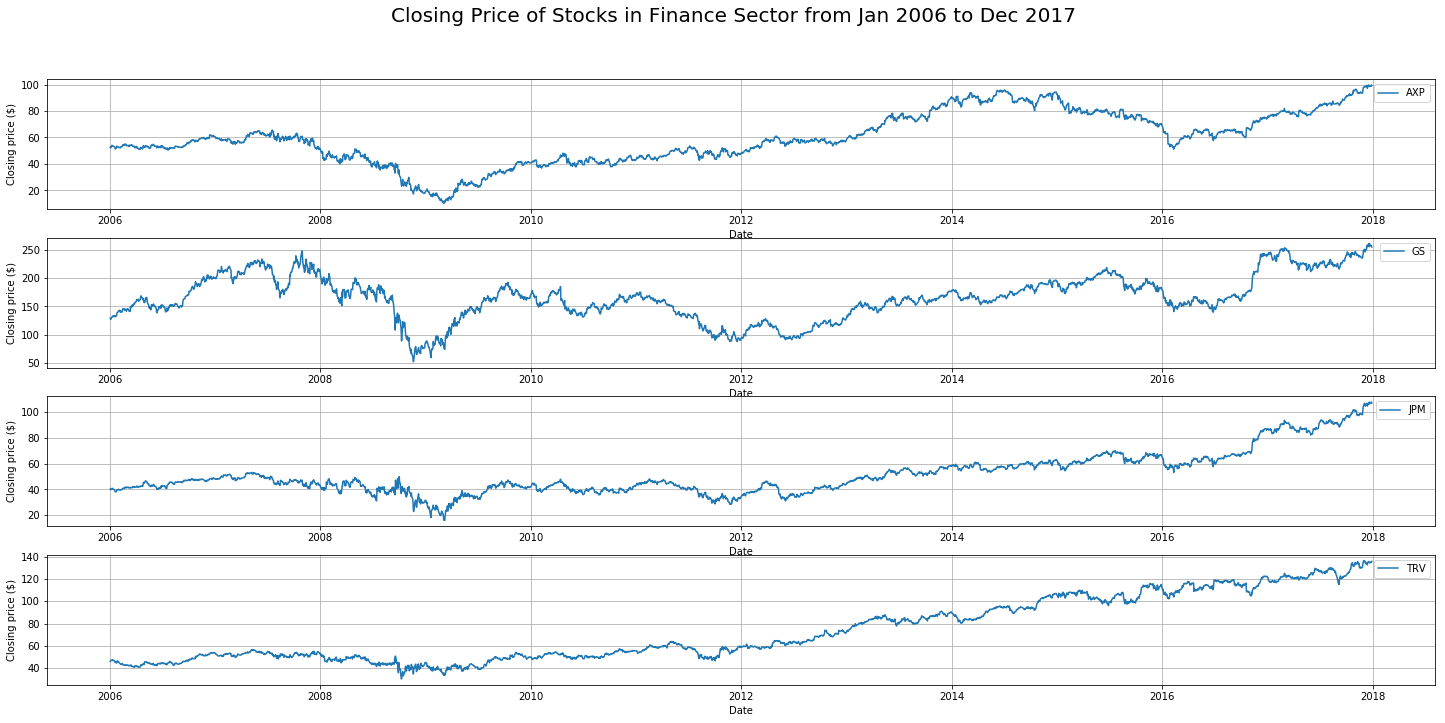

In [10]:
fig, ax = plt.subplots(4, figsize=(20,10))
fig.tight_layout()
for ind, c in enumerate(fin_close):
    ax[ind].plot(fin_close.index, fin_close[c], label=str(c))
    ax[ind].legend()
    ax[ind].grid(True)
    ax[ind].set_ylabel('Closing price ($)')
    ax[ind].set_xlabel('Date')
fig.subplots_adjust(top=0.88)
fig.suptitle('Closing Price of Stocks in Finance Sector from Jan 2006 to Dec 2017',fontsize=20)
plt.show()

Volume of traded stocks in Finance Sector

In [11]:
fin_vol = fin['Volume'].copy()
fin_vol.head()

Stocks,AXP,GS,JPM,TRV
Date,,,,
2006-01-03,7825700.0,6188700.0,12839400.0,3843800.0
2006-01-04,5729400.0,4862000.0,13491800.0,2285900.0
2006-01-05,3926000.0,3717600.0,8109400.0,3069300.0
2006-01-06,4137800.0,4319600.0,7966900.0,2641500.0
2006-01-09,6093300.0,4723500.0,16575200.0,2201500.0


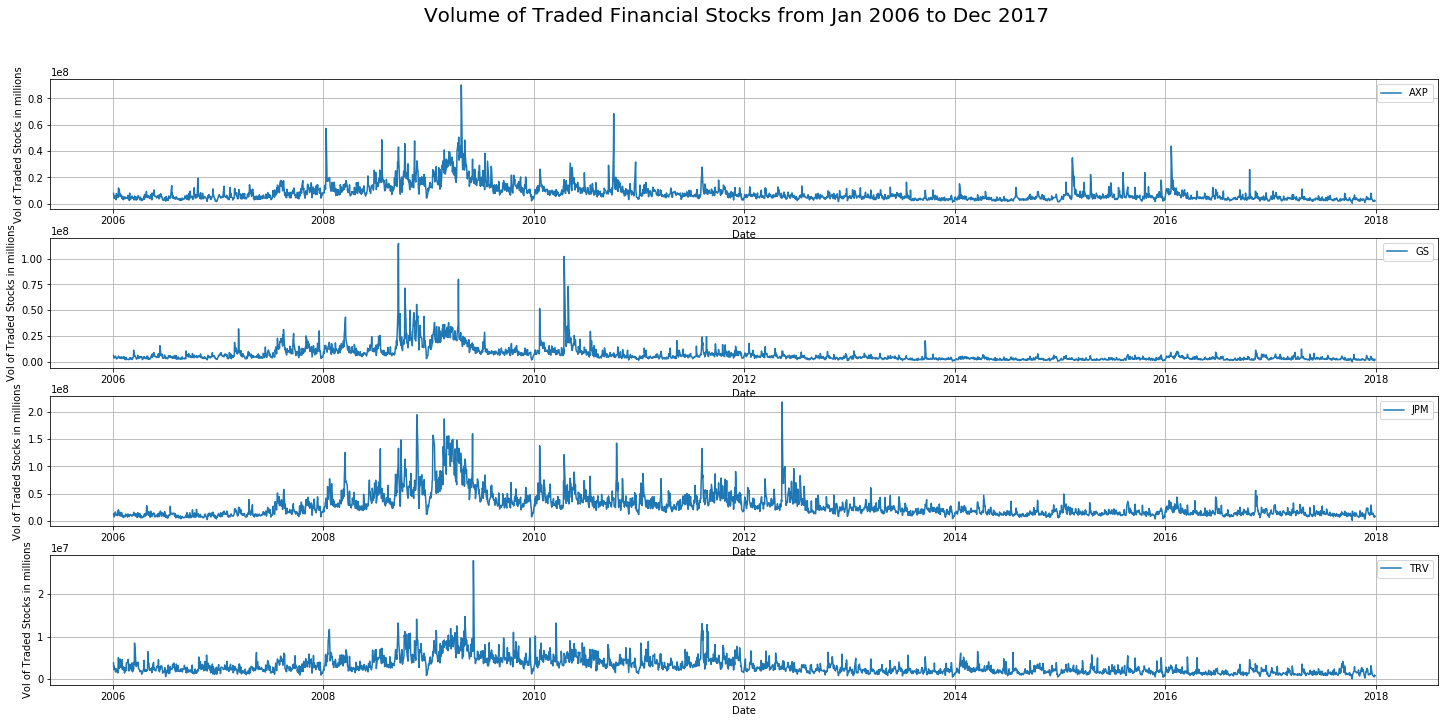

In [12]:
fig, ax = plt.subplots(4, figsize=(20,10))
fig.tight_layout()
for ind, c in enumerate(fin_vol):
    ax[ind].plot(fin_vol.index, fin_vol[c], label=str(c))
    ax[ind].legend()
    ax[ind].grid(True)
    ax[ind].set_ylabel('Vol of Traded Stocks in millions')
    ax[ind].set_xlabel('Date')
fig.subplots_adjust(top=0.88)
fig.suptitle('Volume of Traded Financial Stocks from Jan 2006 to Dec 2017',fontsize=20)
plt.show()

Financial stock’s daily returns since the beginning of the period of interest - 3rd Jan 2006.

Text(0.5,1,'Financial stock’s Daily Returns since Jan 2006')

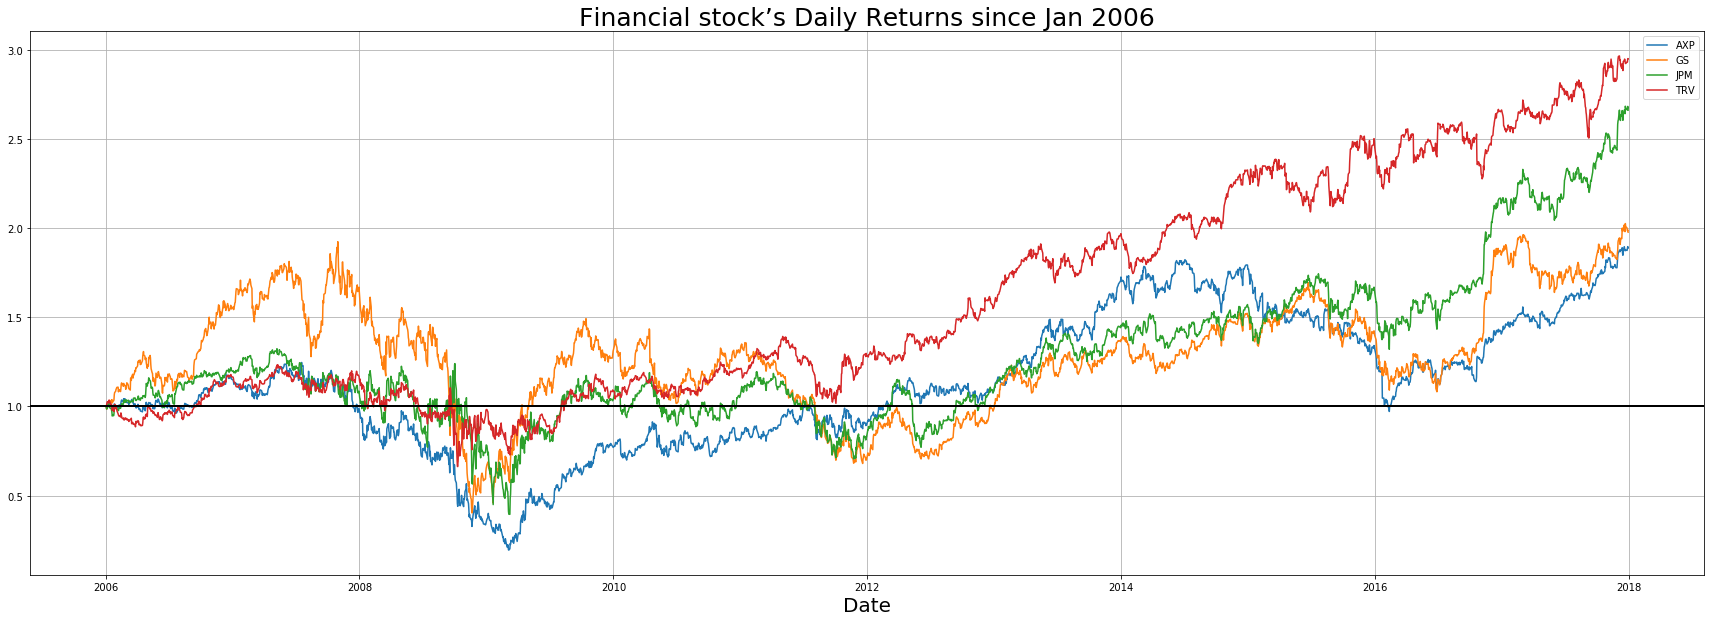

In [13]:
fin_stock_return = fin_close.apply(lambda x: x / x[0])

fig, ax = plt.subplots(figsize=(30,10))

for c in fin_stock_return:
    ax.plot(fin_stock_return.index, fin_stock_return[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.axhline(y=1, linewidth=2, color = 'k')
ax.set_xlabel('Date',fontsize=20)
ax.set_title('Financial stock’s Daily Returns since Jan 2006',fontsize=25)

The above graph indicates that the returns in Dec 2017 since Jan 2006 is highest for The Travelers Companies, Inc. followed by 
JPMorgan Chase & Co., Goldman Sachs Group, Inc. and American Express Company.

Heatmap - Correlation between rate of change of closing price between American Express, Goldman Sachs Group, Inc., JPMorgan Chase & Co., The Travelers Companies, Inc.

In [14]:
bank_returns = fin_close.pct_change()*100
bank_returns.head()

Stocks,AXP,GS,JPM,TRV
Date,,,,
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,-1.198174,-1.381237,-1.418263,1.108937
2006-01-05,1.058710,-0.039342,0.302877,0.967742
2006-01-06,0.342857,1.416877,0.704580,0.553781
2006-01-09,2.486712,1.203043,1.624188,0.042364


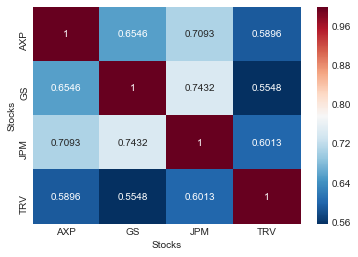

In [15]:
sns.set_style('whitegrid')
sns.heatmap(bank_returns.corr(),annot=True,fmt=".4g",cmap='RdBu_r')

From the heatmap, it can be inferred that there is high correlation between rate of change of closing price of financial stocks.

Bar Chart - Distribution of Financial Stock's Daily returns

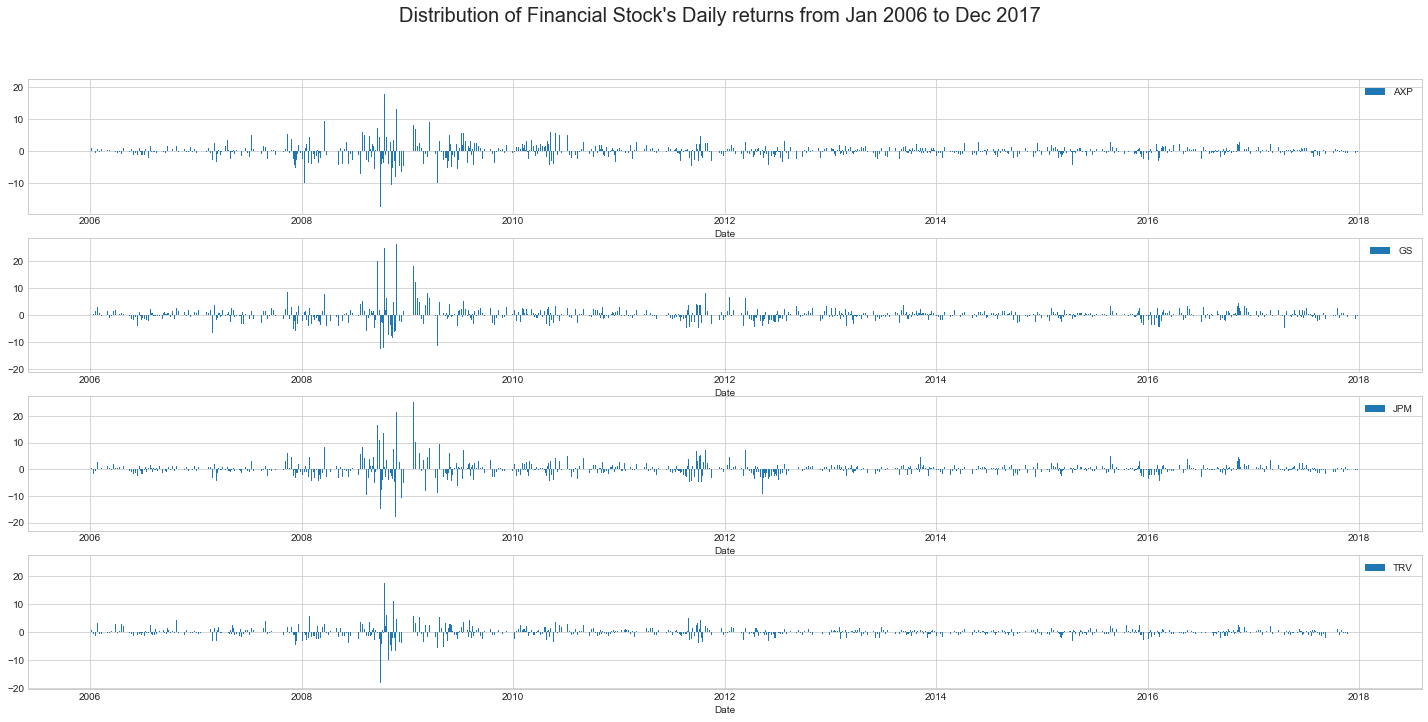

In [16]:
fig, ax = plt.subplots(4, figsize=(20,10))
fig.tight_layout()
for ind, c in enumerate(bank_returns):
    ax[ind].bar(bank_returns.index, bank_returns[c], align='center', label=str(c))
    ax[ind].legend()
    ax[ind].grid(True)
    ax[ind].set_xlabel('Date')
fig.subplots_adjust(top=0.88)
fig.suptitle("Distribution of Financial Stock's Daily returns from Jan 2006 to Dec 2017",fontsize=20)
plt.show()

Candlestick charts - Open, Close, High, Low

In [17]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


In [18]:
def pandas_candlestick_ohlc(dat, stick = "day", adj = False, otherseries = None):
    """This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed."""
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    fields = ["Open", "High", "Low", "Close"]
    if adj:
        fields = ["Adj. " + s for s in fields]
    transdat = dat.loc[:,fields]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = transdat.index.week # Identify weeks
            elif stick == "month":
                transdat["month"] = transdat.index.month # Identify months
            transdat["year"] = transdat.index.year # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
     # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots(figsize=(15,9))
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
    
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 


a) Each candlestick indicates the difference between opening price of first trading day and closing price of last trading day of every month from Jan 2006 to Dec 2017.

b) Black candlestick indicates that the closing price was higher than the opening price (monthly gain).

c) Red candlestick indicates that the opening price was higher than the closing price (monthly loss).

d) The wicks indicate the high and the low prices within a month and the body indicates the opening and closing price.

1) American Express Company

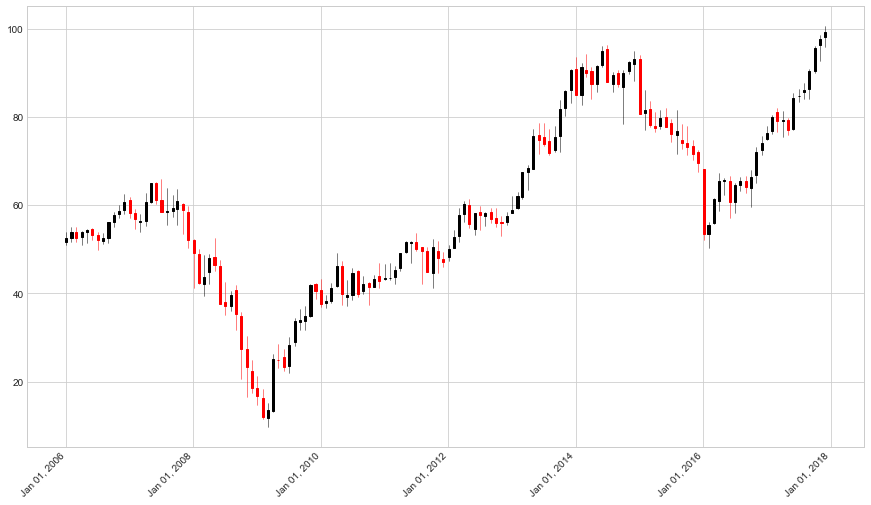

In [19]:
AXP = stocks.loc[idx[:],idx[:, 'AXP']].copy()
AXP.columns = AXP.columns.droplevel(1)
AXP.dropna(inplace=True)
pandas_candlestick_ohlc(AXP, stick="month", adj=False)

2) Goldman Sachs Group, Inc.

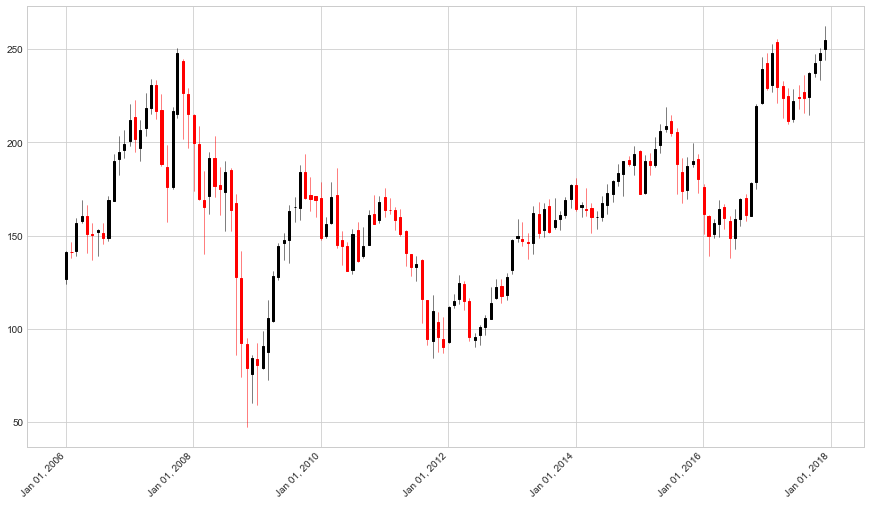

In [20]:
GS = stocks.loc[idx[:],idx[:, 'GS']].copy()
GS.columns = GS.columns.droplevel(1)
GS.dropna(inplace=True)
pandas_candlestick_ohlc(GS, stick="month", adj=False)

3) JPMorgan Chase & Co.

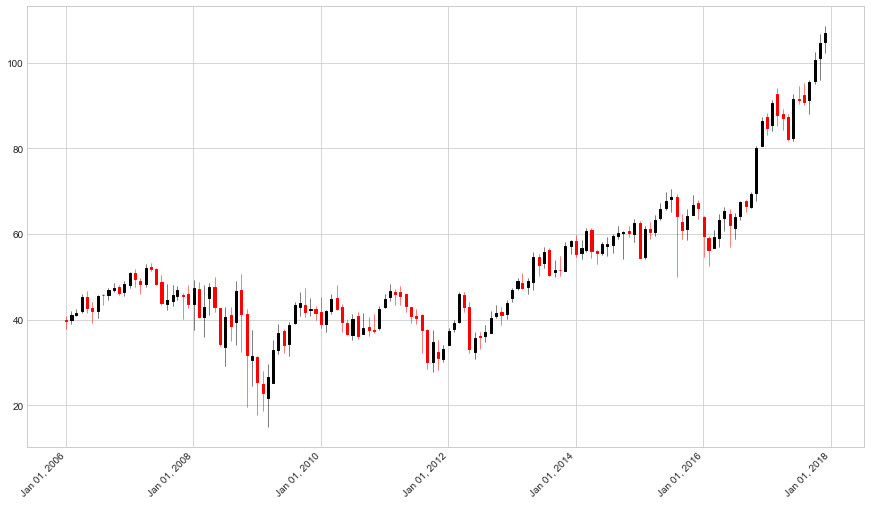

In [21]:
JPM = stocks.loc[idx[:],idx[:, 'JPM']].copy()
JPM.columns = JPM.columns.droplevel(1)
JPM.dropna(inplace=True)
pandas_candlestick_ohlc(JPM, stick="month", adj=False)

4) The Travelers Companies, Inc.

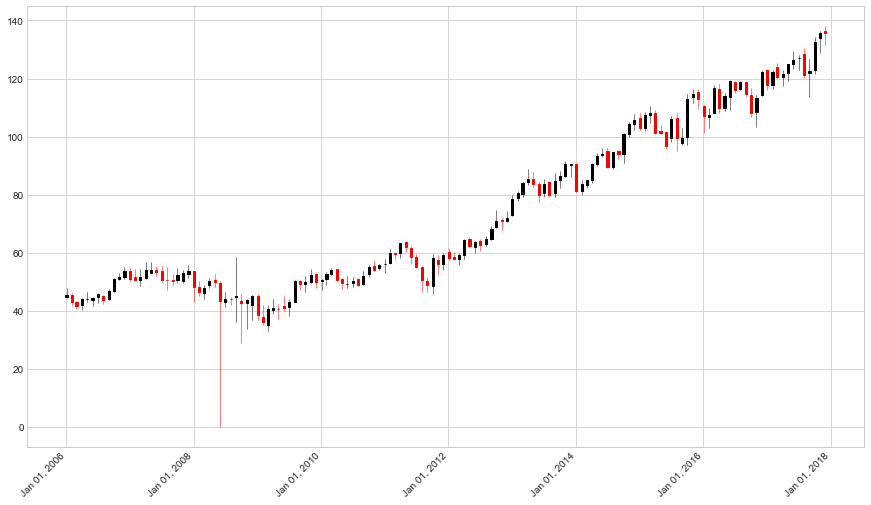

In [22]:
TRV = stocks.loc[idx[:],idx[:, 'TRV']].copy()
TRV.columns = TRV.columns.droplevel(1)
TRV.dropna(inplace=True)
pandas_candlestick_ohlc(TRV, stick="month", adj=False)

Exploratory data analysis can be performed in the similar way for stocks in other sectors.

**3) You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.**

**Summary**

The following descriptive analysis have been performed for stocks in technology sector (AAPL - Apple Inc. and MSFT - Microsoft Corporation) and provided insights after comparing the two stocks.

a) Moving Average (MA) and Volume Weighted Moving Average (VWMA)

b) Monthly Returns

c) Yearly Data Analysis

d) Compound Annual Growth Rate (CAGR)

e) Volatility

f) Correlation between rate of change of closing price between two stocks

In [23]:
AAPL = stocks.loc[idx[:],idx[:, 'AAPL']].copy()
AAPL.columns = AAPL.columns.droplevel(1)
AAPL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036.0
2006-01-04,10.73,10.85,10.64,10.71,155225609.0
2006-01-05,10.69,10.70,10.54,10.63,112396081.0
2006-01-06,10.75,10.96,10.65,10.90,176139334.0
2006-01-09,10.96,11.03,10.82,10.86,168861224.0


In [24]:
MSFT = stocks.loc[idx[:],idx[:, 'MSFT']].copy()
MSFT.columns = MSFT.columns.droplevel(1)
MSFT.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,26.25,27.00,26.10,26.84,79974418.0
2006-01-04,26.77,27.08,26.77,26.97,57975661.0
2006-01-05,26.96,27.13,26.91,26.99,48247610.0
2006-01-06,26.89,27.00,26.49,26.91,100969092.0
2006-01-09,26.93,27.07,26.76,26.86,55627836.0


1) Moving Average (MA) and Volume Weighted Moving Average (VWMA)

Moving Average (MA) is an average of the past N closing prices. It gives the same weight to every closing price. It is an indicator that helps smooth out price action by filtering out the noise from random price fluctuations. It is a trend-following or lagging indicator because it is based on past prices.

A Volume-Weighted Moving Average (VWMA) is same as MA, except that it gives different weight to each closing price. The closing price with high volume will have a greater weight.

Standardizing the columns of AAPL and MSFT dataframes

In [25]:
AAPL_std = AAPL.copy()
for c in AAPL_std:
    AAPL_std[c] = (AAPL_std[c] - AAPL_std[c].min()) / (AAPL_std[c].max() - AAPL_std[c].min())
AAPL_std.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,0.017589,0.018392,0.018785,0.020333,0.228877
2006-01-04,0.019914,0.019394,0.020693,0.020511,0.172820
2006-01-05,0.019676,0.018510,0.020097,0.020038,0.121329
2006-01-06,0.020033,0.020042,0.020753,0.021634,0.197963
2006-01-09,0.021285,0.020455,0.021766,0.021397,0.189213


In [26]:
MSFT_std = MSFT.copy()
for c in MSFT_std:
    MSFT_std[c] = (MSFT_std[c] - MSFT_std[c].min()) / (MSFT_std[c].max() - MSFT_std[c].min())
MSFT_std.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,0.153643,0.158319,0.157371,0.163040,0.124301
2006-01-04,0.160873,0.159432,0.166760,0.164854,0.086610
2006-01-05,0.163515,0.160128,0.168722,0.165132,0.069942
2006-01-06,0.162542,0.158319,0.162836,0.164017,0.160272
2006-01-09,0.163098,0.159293,0.166620,0.163319,0.082587


MA and VWMA in the range of 20, 50 and 200 days for Apple Inc. Stocks

In [27]:
AAPL_MA = AAPL_std.copy()
MA_day = [20, 50, 200]

AAPL_MA['CV'] = AAPL_MA['Close'] * AAPL_MA['Volume']

for ma in MA_day:
    MA = 'MA for {0} days' .format(str(ma))
    CV = 'CV for {0} days' .format(str(ma))
    V = 'V for {0} days' .format(str(ma))
    VWMA = 'VWMA for {0} days' .format(str(ma))
    AAPL_MA[MA] = AAPL_MA['Close'].rolling(ma).mean()
    AAPL_MA[CV] = AAPL_MA['CV'].rolling(ma).sum()
    AAPL_MA[V] = AAPL_MA['Volume'].rolling(ma).sum()
    AAPL_MA[VWMA] = AAPL_MA[CV] / AAPL_MA[V]
    
AAPL_MA.columns = ['AAPL_' + str(col) for col in AAPL_MA.columns]

AAPL_MA.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume,AAPL_CV,AAPL_MA for 20 days,AAPL_CV for 20 days,AAPL_V for 20 days,AAPL_VWMA for 20 days,AAPL_MA for 50 days,AAPL_CV for 50 days,AAPL_V for 50 days,AAPL_VWMA for 50 days,AAPL_MA for 200 days,AAPL_CV for 200 days,AAPL_V for 200 days,AAPL_VWMA for 200 days
Date,,,,,,,,,,,,,,,,,,
2006-01-03,0.017589,0.018392,0.018785,0.020333,0.228877,0.004654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.019914,0.019394,0.020693,0.020511,0.172820,0.003545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,0.019676,0.018510,0.020097,0.020038,0.121329,0.002431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,0.020033,0.020042,0.020753,0.021634,0.197963,0.004283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,0.021285,0.020455,0.021766,0.021397,0.189213,0.004049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MA and VWMA in the range of 20, 50 and 200 days for Microsoft Corporation Stocks

In [28]:
MSFT_MA = MSFT_std.copy()
MA_day = [20, 50, 200]

MSFT_MA['CV'] = MSFT_MA['Close'] * MSFT_MA['Volume']

for ma in MA_day:
    MA = 'MA for {0} days' .format(str(ma))
    CV = 'CV for {0} days' .format(str(ma))
    V = 'V for {0} days' .format(str(ma))
    VWMA = 'VWMA for {0} days' .format(str(ma))
    MSFT_MA[MA] = MSFT_MA['Close'].rolling(ma).mean()
    MSFT_MA[CV] = MSFT_MA['CV'].rolling(ma).sum()
    MSFT_MA[V] = MSFT_MA['Volume'].rolling(ma).sum()
    MSFT_MA[VWMA] = MSFT_MA[CV] / MSFT_MA[V]
    
MSFT_MA.columns = ['MSFT_' + str(col) for col in MSFT_MA.columns]

MSFT_MA.head()

,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Volume,MSFT_CV,MSFT_MA for 20 days,MSFT_CV for 20 days,MSFT_V for 20 days,MSFT_VWMA for 20 days,MSFT_MA for 50 days,MSFT_CV for 50 days,MSFT_V for 50 days,MSFT_VWMA for 50 days,MSFT_MA for 200 days,MSFT_CV for 200 days,MSFT_V for 200 days,MSFT_VWMA for 200 days
Date,,,,,,,,,,,,,,,,,,
2006-01-03,0.153643,0.158319,0.157371,0.163040,0.124301,0.020266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.160873,0.159432,0.166760,0.164854,0.086610,0.014278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,0.163515,0.160128,0.168722,0.165132,0.069942,0.011550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,0.162542,0.158319,0.162836,0.164017,0.160272,0.026287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,0.163098,0.159293,0.166620,0.163319,0.082587,0.013488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
AAPL_MSFT_MA = AAPL_MA.join(MSFT_MA,how='inner')
AAPL_MSFT_MA.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume,AAPL_CV,AAPL_MA for 20 days,AAPL_CV for 20 days,AAPL_V for 20 days,AAPL_VWMA for 20 days,...,MSFT_V for 20 days,MSFT_VWMA for 20 days,MSFT_MA for 50 days,MSFT_CV for 50 days,MSFT_V for 50 days,MSFT_VWMA for 50 days,MSFT_MA for 200 days,MSFT_CV for 200 days,MSFT_V for 200 days,MSFT_VWMA for 200 days
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,0.017589,0.018392,0.018785,0.020333,0.228877,0.004654,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.019914,0.019394,0.020693,0.020511,0.172820,0.003545,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,0.019676,0.018510,0.020097,0.020038,0.121329,0.002431,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,0.020033,0.020042,0.020753,0.021634,0.197963,0.004283,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,0.021285,0.020455,0.021766,0.021397,0.189213,0.004049,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


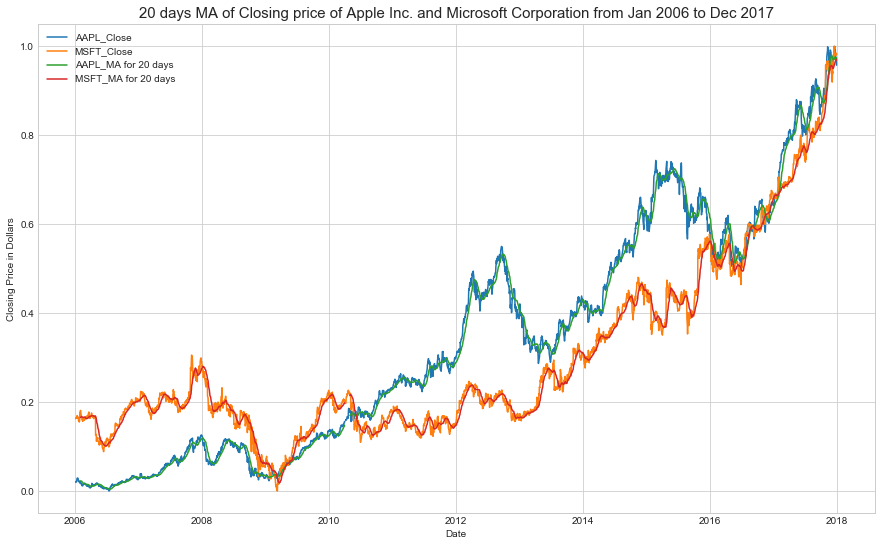

In [30]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['AAPL_Close','MSFT_Close','AAPL_MA for 20 days','MSFT_MA for 20 days']:
    ax.plot(AAPL_MSFT_MA.index, AAPL_MSFT_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('20 days MA of Closing price of Apple Inc. and Microsoft Corporation from Jan 2006 to Dec 2017',fontsize=15)
plt.show()

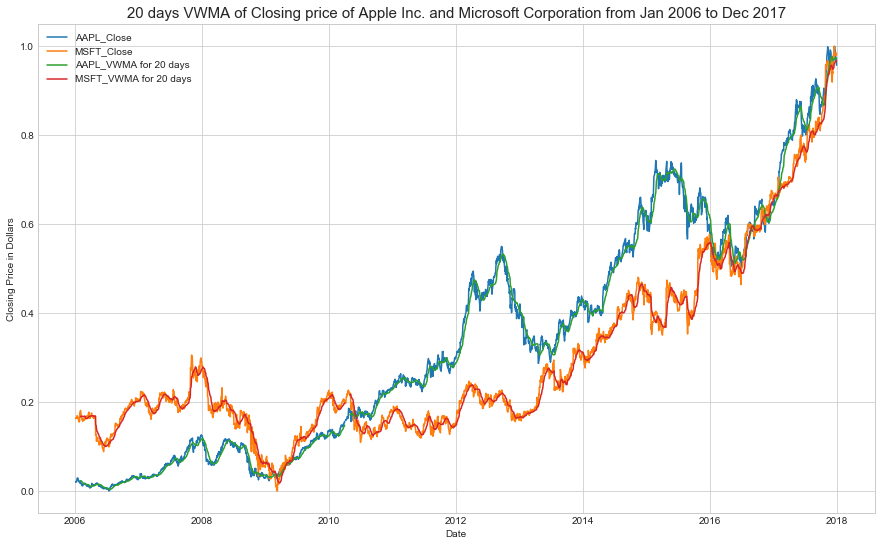

In [31]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['AAPL_Close','MSFT_Close','AAPL_VWMA for 20 days','MSFT_VWMA for 20 days']:
    ax.plot(AAPL_MSFT_MA.index, AAPL_MSFT_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('20 days VWMA of Closing price of Apple Inc. and Microsoft Corporation from Jan 2006 to Dec 2017',fontsize=15)
plt.show()

Initially, Microsoft Crporation's 20 days MA and VWMA was higher than Apple Inc. Around mid 2010, Apple Inc. surpassed  20 days MA and VWMA of Microsoft Corporation and its dominating till the last trading day in the dataset - 29 Dec 2017.

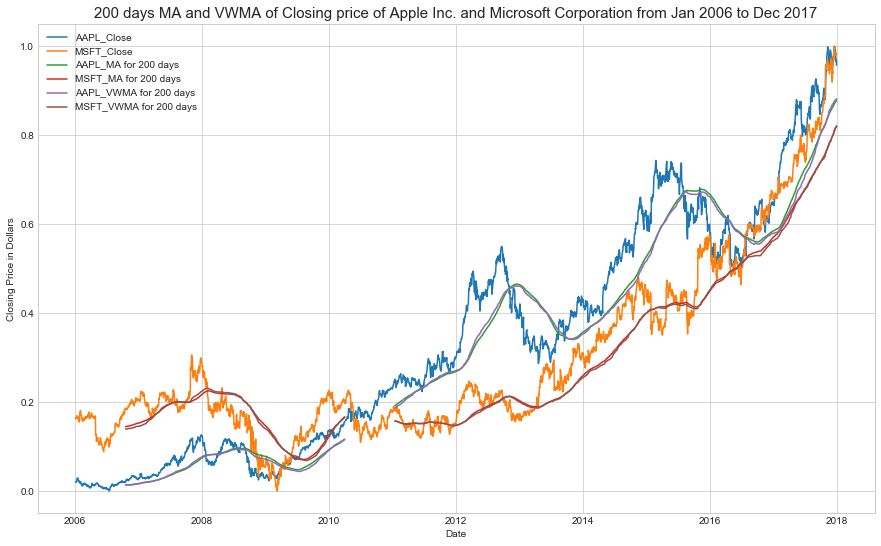

In [32]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['AAPL_Close','MSFT_Close','AAPL_MA for 200 days','MSFT_MA for 200 days','AAPL_VWMA for 200 days','MSFT_VWMA for 200 days']:
    ax.plot(AAPL_MSFT_MA.index, AAPL_MSFT_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('200 days MA and VWMA of Closing price of Apple Inc. and Microsoft Corporation from Jan 2006 to Dec 2017',fontsize=15)
plt.show()

In the above graph, when the price crosses above or below a moving average, there is a potential change in trend. If VWMA is above MA, it means that volume has been higher on up days. When VWMA is below MA, it means that down days had higher volume.

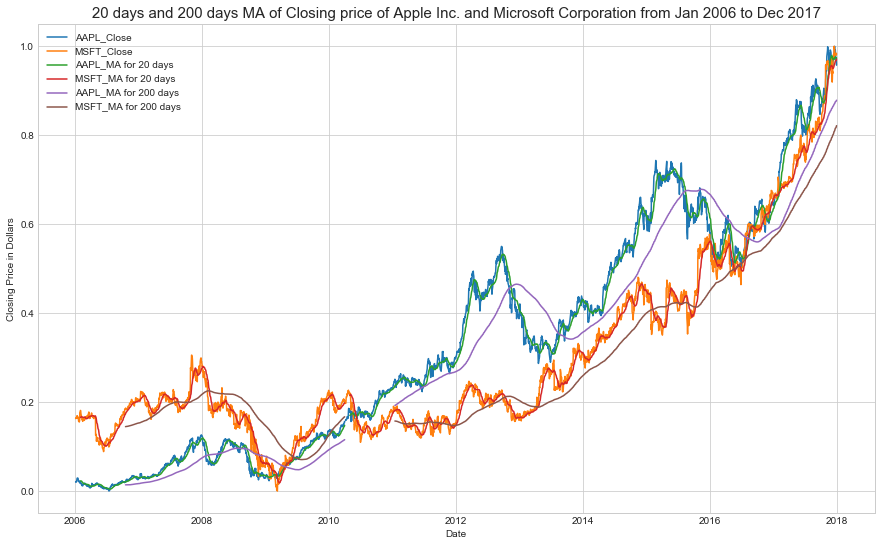

In [33]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['AAPL_Close','MSFT_Close','AAPL_MA for 20 days','MSFT_MA for 20 days','AAPL_MA for 200 days','MSFT_MA for 200 days']:
    ax.plot(AAPL_MSFT_MA.index, AAPL_MSFT_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('20 days and 200 days MA of Closing price of Apple Inc. and Microsoft Corporation from Jan 2006 to Dec 2017',fontsize=15)
plt.show()

When the shorter-term MA crosses above the longer-term MA, it's a buy signal since trend is shifting up. When the shorter-term MA crosses below the longer-term MA, it's a sell signal since trend is shifting down.

2) Monthly Returns

In [34]:
tech = stocks.loc[idx[:],idx[:, ['AABA','AAPL','CSCO','GOOGL','IBM','INTC','MSFT']]]
tech_close = tech['Close'].copy()
tech_close.head()

Stocks,AABA,AAPL,CSCO,GOOGL,IBM,INTC,MSFT
Date,,,,,,,
2006-01-03,40.91,10.68,17.45,217.83,82.06,25.57,26.84
2006-01-04,40.97,10.71,17.85,222.84,81.95,25.91,26.97
2006-01-05,41.53,10.63,18.35,225.85,82.50,26.27,26.99
2006-01-06,43.21,10.90,18.77,233.06,84.95,26.31,26.91
2006-01-09,43.42,10.86,19.06,233.68,83.73,26.47,26.86


*_start - Opening price of a stock in the first trading day of the month.

*_end - Closing price of a stock in the last trading day of the month.

Percentage change between *_start and *_end gives Monthly returns.

In [35]:
tech_close_monthly_return = tech_close.copy()
tech_close_monthly_return['month'] = tech_close_monthly_return.index.month
tech_close_monthly_return['year'] = tech_close_monthly_return.index.year
tech_close_monthly_return['Month_Year'] = tech_close_monthly_return.index.strftime('%b-%Y')
tech_close_monthly_return_start_CP = tech_close_monthly_return.groupby(by=['Month_Year']).first().sort_values(['year', 'month'], ascending=[True, True])

tech_close_monthly_return_start_CP.columns = [str(col) + '_start' for col in tech_close_monthly_return_start_CP.columns]

tech_close_monthly_return_end_CP = tech_close_monthly_return.groupby(by=['Month_Year']).last().sort_values(['year', 'month'], ascending=[True, True])
tech_close_monthly_return_end_CP.columns = [str(col) + '_end' for col in tech_close_monthly_return_end_CP.columns]

tech_close_monthly_return_final = tech_close_monthly_return_start_CP.join(tech_close_monthly_return_end_CP,how='inner')
tech_close_monthly_return_final.head()


,AABA_start,AAPL_start,CSCO_start,GOOGL_start,IBM_start,INTC_start,MSFT_start,month_start,year_start,AABA_end,AAPL_end,CSCO_end,GOOGL_end,IBM_end,INTC_end,MSFT_end,month_end,year_end
Month_Year,,,,,,,,,,,,,,,,,,
Jan-2006,40.91,10.68,17.45,217.83,82.06,25.57,26.84,1,2006,34.38,10.79,18.57,216.55,81.30,21.26,28.15,1,2006
Feb-2006,35.00,10.77,18.58,201.09,81.94,21.55,28.04,2,2006,32.06,9.78,20.24,181.49,80.24,20.60,26.87,2,2006
Mar-2006,32.18,9.87,21.06,182.58,79.90,20.80,27.14,3,2006,32.26,8.96,21.67,195.19,82.47,19.46,27.21,3,2006
Apr-2006,31.89,8.95,21.59,195.04,83.06,19.35,27.56,4,2006,32.78,10.06,20.95,209.18,82.34,19.98,24.15,4,2006
May-2006,32.08,9.94,20.96,199.65,82.23,19.49,24.29,5,2006,31.59,8.54,19.68,186.10,79.90,18.02,22.65,5,2006


In [36]:
aapl_msft_monthly_return = tech_close_monthly_return_final[['AAPL_start','AAPL_end','MSFT_start','MSFT_end']].copy()
aapl_msft_monthly_return['MSFT'] = (aapl_msft_monthly_return['MSFT_end'] - aapl_msft_monthly_return['MSFT_start']) / aapl_msft_monthly_return['MSFT_start']
aapl_msft_monthly_return['AAPL'] = (aapl_msft_monthly_return['AAPL_end'] - aapl_msft_monthly_return['AAPL_start']) / aapl_msft_monthly_return['AAPL_start']
aapl_msft_monthly_return.index = pd.to_datetime(aapl_msft_monthly_return.index)

Text(0.5,1,'Monthly Returns of Apple Inc. and Microsoft Corporation from Jan 2006 to Dec 2017')

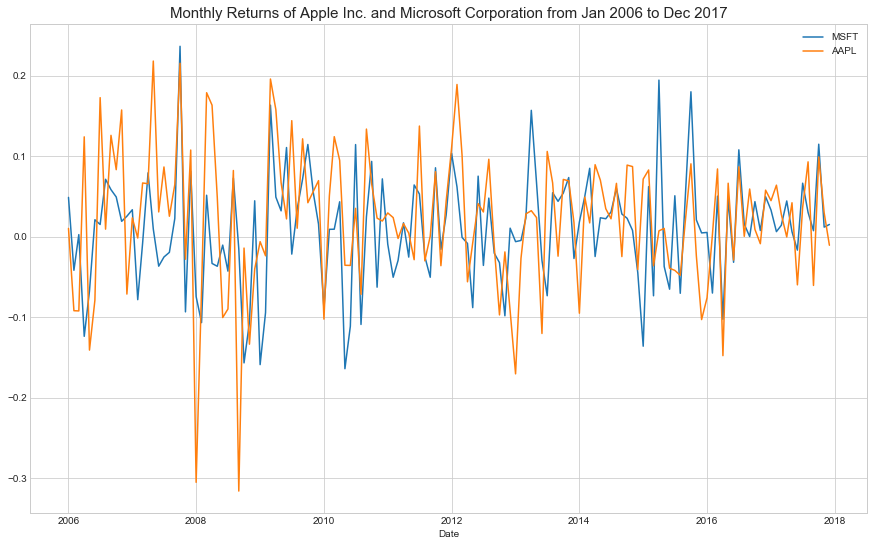

In [37]:
fig, ax = plt.subplots(figsize=(15,9))

for c in ['MSFT','AAPL']:
    ax.plot(aapl_msft_monthly_return.index, aapl_msft_monthly_return[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_xlabel('Date',fontsize=10)
ax.set_title('Monthly Returns of Apple Inc. and Microsoft Corporation from Jan 2006 to Dec 2017',fontsize=15)

From the graph, it can be inferred that monthly returns of Apple Inc. and Microsoft corporation almost moves in the same direction. The magnitude of increase or decrease in monthly returns is high in Apple Inc. than Microsoft Corporation.

3) Computing the Yearly Data for Apple Inc. and Microsoft Corporation stocks from Jan 2006 to Dec 2017.

Open - Opening price of first trading day in the year.

Close - Closing price of last trading day in the year.

High - Highest price of the stock in the year.

Low - Lowest price of the stock in the year.

Volume - Average Volume of stocks traded in the year.

Apple Inc.'s Yearly Data

In [38]:
AAPL_YearlyData = AAPL.groupby(AAPL.index.year).first()[['Open']].join(AAPL.groupby(AAPL.index.year).last()[['Close']],how='inner').join(AAPL.groupby(AAPL.index.year).max()[['High']],how='inner').join(AAPL.groupby(AAPL.index.year).min()[['Low']],how='inner').join(AAPL.groupby(AAPL.index.year).mean()[['Volume']],how='inner')
AAPL_YearlyData['Years'] = (AAPL_YearlyData.index - AAPL_YearlyData.index[0]) + 1
AAPL_YearlyData['Open_Comp'] = AAPL_YearlyData['Open'].iloc[0]
AAPL_YearlyData['CAGR_AAPL'] = ((AAPL_YearlyData['Close'] / AAPL_YearlyData['Open_Comp']) ** (1 / AAPL_YearlyData['Years'])) - 1
AAPL_YearlyData

,Open,Close,High,Low,Volume,Years,Open_Comp,CAGR_AAPL
Date,,,,,,,,
2006,10.34,12.12,13.31,7.17,2.150709e+08,1,10.34,0.172147
2007,12.33,28.30,28.99,11.70,2.464126e+08,2,10.34,0.654371
2008,28.47,12.19,28.61,11.31,2.827357e+08,3,10.34,0.056398
2009,12.27,30.10,30.56,11.17,1.422653e+08,4,10.34,0.306205
2010,30.49,46.08,46.67,27.18,1.498517e+08,5,10.34,0.348337
2011,46.52,57.86,60.96,44.36,1.234475e+08,6,10.34,0.332426
2012,58.49,76.02,100.72,58.43,1.319763e+08,7,10.34,0.329758
2013,79.12,80.15,82.16,55.01,1.016127e+08,8,10.34,0.291733
2014,79.38,110.38,119.75,70.51,6.323211e+07,9,10.34,0.300958


Microsoft Corporation's Yearly Data

In [39]:
MSFT_YearlyData = MSFT.groupby(MSFT.index.year).first()[['Open']].join(MSFT.groupby(MSFT.index.year).last()[['Close']],how='inner').join(MSFT.groupby(MSFT.index.year).max()[['High']],how='inner').join(MSFT.groupby(MSFT.index.year).min()[['Low']],how='inner').join(MSFT.groupby(MSFT.index.year).mean()[['Volume']],how='inner')
MSFT_YearlyData['Years'] = (MSFT_YearlyData.index - MSFT_YearlyData.index[0]) + 1
MSFT_YearlyData['Open_Comp'] = MSFT_YearlyData['Open'].iloc[0]
MSFT_YearlyData['CAGR_MSFT'] = ((MSFT_YearlyData['Close'] / MSFT_YearlyData['Open_Comp']) ** (1 / MSFT_YearlyData['Years'])) - 1
MSFT_YearlyData

,Open,Close,High,Low,Volume,Years,Open_Comp,CAGR_MSFT
Date,,,,,,,,
2006,26.25,29.86,30.26,21.46,6.718922e+07,1,26.25,0.137524
2007,29.91,35.60,37.50,26.60,6.253800e+07,2,26.25,0.164556
2008,35.79,19.44,35.96,17.50,8.424315e+07,3,26.25,-0.095263
2009,19.53,30.48,31.50,14.87,6.244271e+07,4,26.25,0.038058
2010,30.62,27.91,31.58,22.73,6.303515e+07,5,26.25,0.012339
2011,28.05,25.96,29.46,23.65,6.077909e+07,6,26.25,-0.001850
2012,26.55,26.71,32.95,26.26,4.794077e+07,7,26.25,0.002485
2013,27.25,37.41,38.98,26.28,4.862585e+07,8,26.25,0.045279
2014,37.35,46.45,50.04,34.63,3.339201e+07,9,26.25,0.065466


4) Compound Annual Growth Rate (CAGR) - Rate of return, usually expressed as a percentage, that represents the cumulative effect that a series of gains or losses has on an original amount of capital over a period of time. Compound returns are usually expressed in annual terms, meaning that the percentage number that is reported represents the annualized rate at which capital has compounded over time.

In [40]:
CAGR = MSFT_YearlyData[['CAGR_MSFT']].join(AAPL_YearlyData[['CAGR_AAPL']],how='inner')
CAGR

,CAGR_MSFT,CAGR_AAPL
Date,,
2006,0.137524,0.172147
2007,0.164556,0.654371
2008,-0.095263,0.056398
2009,0.038058,0.306205
2010,0.012339,0.348337
2011,-0.001850,0.332426
2012,0.002485,0.329758
2013,0.045279,0.291733
2014,0.065466,0.300958


Text(0.5,1,'CAGR of Apple Inc. and Microsoft Corporation from Jan 2006 to Dec 2007')

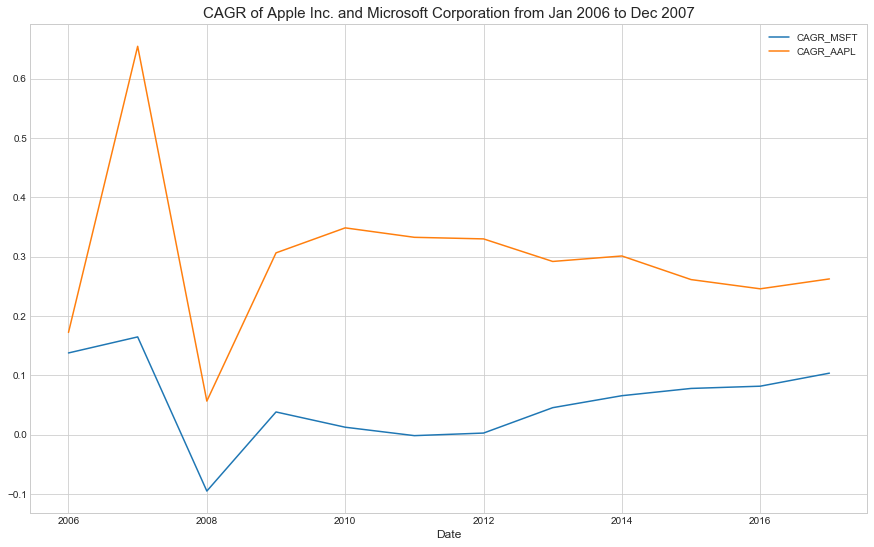

In [41]:
fig, ax = plt.subplots(figsize=(15,9))

for c in CAGR:
    ax.plot(CAGR.index, CAGR[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_xlabel('Date',fontsize=12)
ax.set_title('CAGR of Apple Inc. and Microsoft Corporation from Jan 2006 to Dec 2007',fontsize=15)

The above graph shows that compound annual growth rate of Apple Inc. is higher than Microsoft Corporation.

5) Volatility - Standard deviation is an useful tool in investing and trading strategies as it helps measure market and security volatility and predict performance trends.

Standardizing the columns (Closing price of tech stocks) in tech_close dataframe and calculating the yearly standard deviation of closing price of tech stocks.

In [42]:
tech_vix = tech_close.copy()
for c in tech_vix:
    tech_vix[c] = (tech_vix[c] - tech_vix[c].min()) / (tech_vix[c].max() - tech_vix[c].min())
tech_vix.groupby(tech_vix.index.year).std()

Stocks,AABA,AAPL,CSCO,GOOGL,IBM,INTC,MSFT
Date,,,,,,,
2006,0.060012,0.008044,0.112696,0.022145,0.039732,0.050810,0.032152
2007,0.041909,0.029761,0.091493,0.043252,0.053210,0.070158,0.032343
2008,0.096321,0.028483,0.135901,0.052558,0.113743,0.096574,0.053643
2009,0.025260,0.033618,0.124408,0.046701,0.096596,0.070447,0.059230
2010,0.018861,0.031751,0.087665,0.026441,0.049815,0.037506,0.031134
2011,0.021544,0.021888,0.071120,0.022427,0.074203,0.042830,0.016449
2012,0.020507,0.056555,0.058336,0.027704,0.049255,0.074521,0.022407
2013,0.089355,0.037902,0.070742,0.051675,0.077626,0.038198,0.048183
2014,0.085049,0.079034,0.069300,0.026401,0.079490,0.124528,0.054415


Yearly Standard deviation of Closing Price of Apple Inc. and Microsoft Corporation from Jan 2006 to Dec 2017

Text(0.5,1,'Volatility - Apple Inc. and Microsoft Corporation from Jan 2006 to Dec 2017')

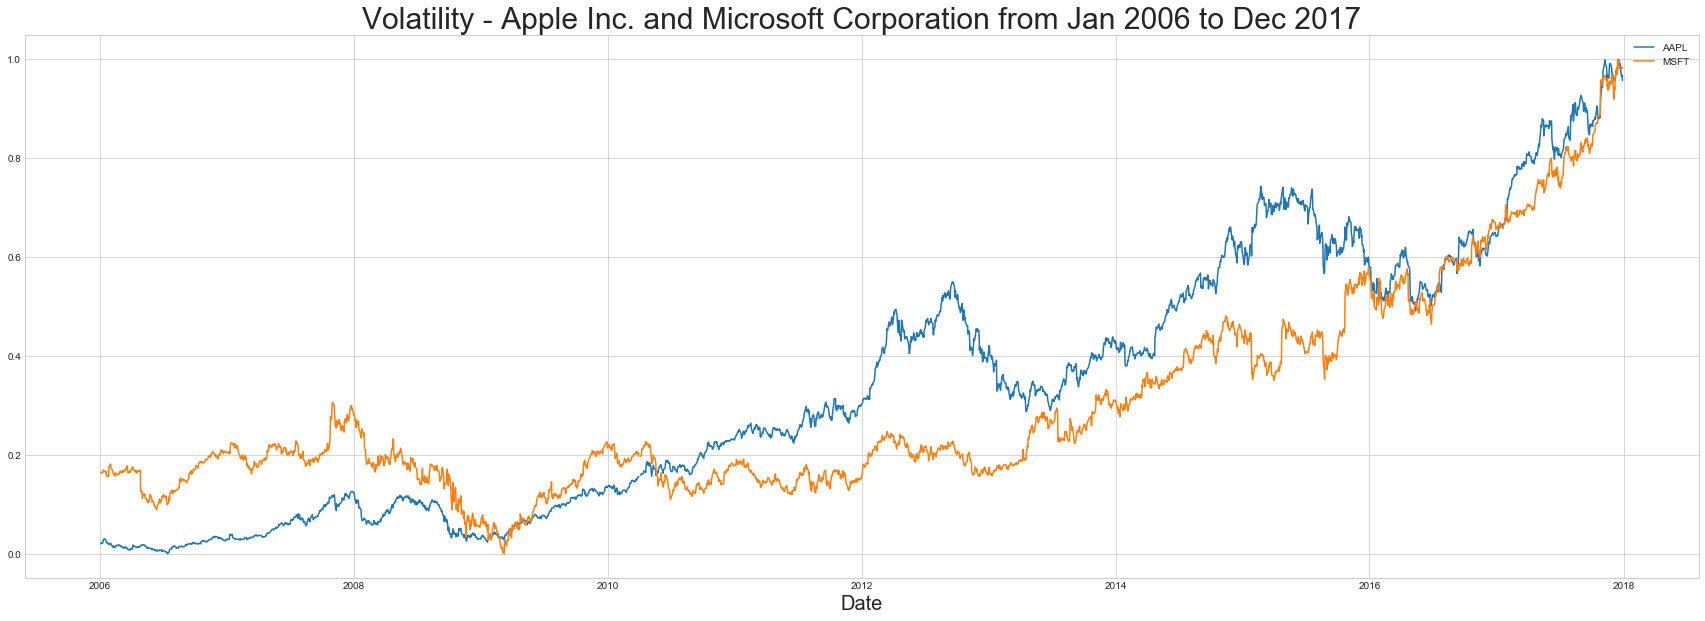

In [43]:
fig, ax = plt.subplots(figsize=(30,10))

for c in ['AAPL','MSFT']:
    ax.plot(tech_vix.index, tech_vix[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_xlabel('Date',fontsize=20)
ax.set_title('Volatility - Apple Inc. and Microsoft Corporation from Jan 2006 to Dec 2017',fontsize=30)

Both Apple Inc. and Microsoft Corporation stocks are volatile. The upward trend in both stocks indicates that they are generating higher-than-average returns. Yearly standard deviation of closing price of Apple Inc. is less compared to Microsoft Corporation till mid 2010 and surpasses it after that. This means returns of Apple Inc. is higher than Microsoft Corporation after mid 2010.

6) Heatmap - Correlation between rate of change of closing price between Apple Inc. and Microsoft Corporation.

In [44]:
tech_returns = tech_close.pct_change()
AAPL_MSFT_returns = tech_returns[['AAPL','MSFT']]
AAPL_MSFT_returns.head()

Stocks,AAPL,MSFT
Date,,
2006-01-03,NaN,NaN
2006-01-04,0.002809,0.004844
2006-01-05,-0.007470,0.000742
2006-01-06,0.025400,-0.002964
2006-01-09,-0.003670,-0.001858


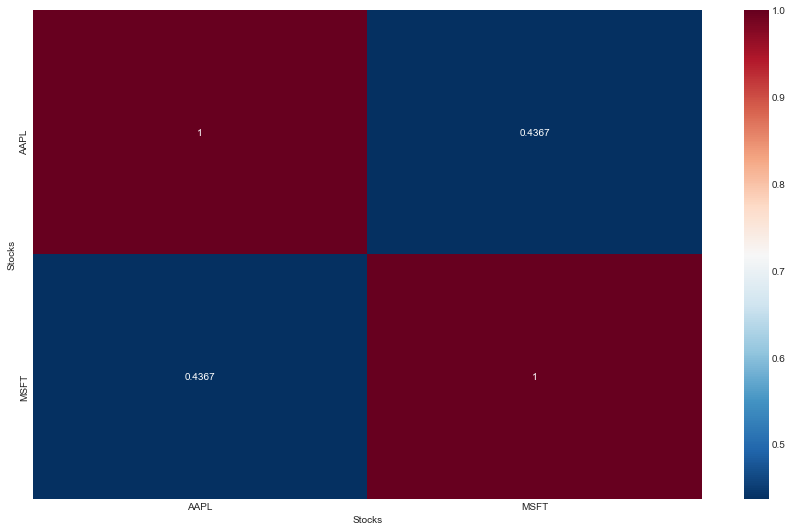

In [45]:
sns.set_style('whitegrid')
sns.heatmap(AAPL_MSFT_returns.corr(),annot=True,fmt=".4g",cmap='RdBu_r')

From the Heatmap, it can be inferred that there is medium correlation between rate of change of closing price of Apple Inc. and Microsoft Corporation.

**4) Take five stocks of your choice and create the same type of report stated in question 3.**

**Summary**

Analysis similar to technology stocks(AAPL, MSFT) in Q3, is performed on the industrial stocks.

The following descriptive analysis have been performed for stocks in Industrial Sector(BA - Boeing Company, CAT - Caterpillar, Inc., GE - General Electric Company, MMM - 3M Company, UTX - United Technologies Corporation)

a) Moving Average (MA) and Volume Weighted Moving Average (VWMA)

b) Monthly Returns

c) Yearly Data Analysis

d) Compound Annual Growth Rate (CAGR)

e) Volatility

1) Moving Average (MA) and Volume Weighted Moving Average (VWMA)

Moving Average in the range of 20, 50 and 200 days for Boeing Company Stocks

In [46]:
BA = stocks.loc[idx[:],idx[:, 'BA']].copy()
BA.columns = BA.columns.droplevel(1)

BA_MA = BA.copy()
MA_day = [20, 50, 200]

BA_MA['CV'] = BA_MA['Close'] * BA_MA['Volume']

for ma in MA_day:
    MA = 'MA for {0} days' .format(str(ma))
    CV = 'CV for {0} days' .format(str(ma))
    V = 'V for {0} days' .format(str(ma))
    VWMA = 'VWMA for {0} days' .format(str(ma))
    BA_MA[MA] = BA_MA['Close'].rolling(ma).mean()
    BA_MA[CV] = BA_MA['CV'].rolling(ma).sum()
    BA_MA[V] = BA_MA['Volume'].rolling(ma).sum()
    BA_MA[VWMA] = BA_MA[CV] / BA_MA[V]

BA_MA.head()



,Open,High,Low,Close,Volume,CV,MA for 20 days,CV for 20 days,V for 20 days,VWMA for 20 days,MA for 50 days,CV for 50 days,V for 50 days,VWMA for 50 days,MA for 200 days,CV for 200 days,V for 200 days,VWMA for 200 days
Date,,,,,,,,,,,,,,,,,,
2006-01-03,70.40,70.60,69.33,70.44,4943100.0,348191964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,70.08,71.27,69.86,71.17,3165000.0,225253050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,70.55,70.55,69.58,70.33,4598300.0,323398439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,70.34,70.50,69.05,69.35,4820200.0,334280870.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,69.28,69.40,68.66,68.77,4567700.0,314120729.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'MA of Closing price of Boeing Company from Jan 2006 to Dec 2017')

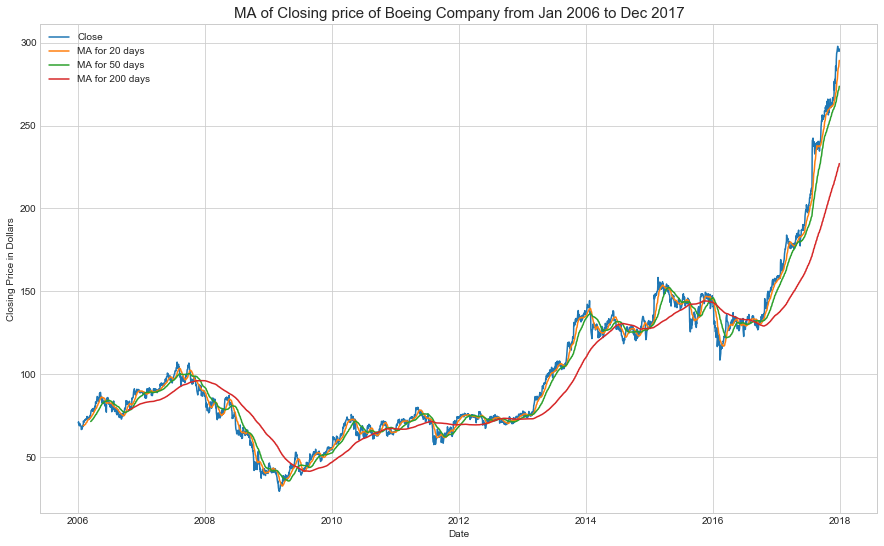

In [47]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['Close','MA for 20 days','MA for 50 days','MA for 200 days']:
    ax.plot(BA_MA.index, BA_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('MA of Closing price of Boeing Company from Jan 2006 to Dec 2017',fontsize=15)

Volume Weighted Moving Average in the range of 20, 50 and 200 days for Boeing Company Stocks

Text(0.5,1,'VWMA of Closing price of Boeing Company from Jan 2006 to Dec 2017')

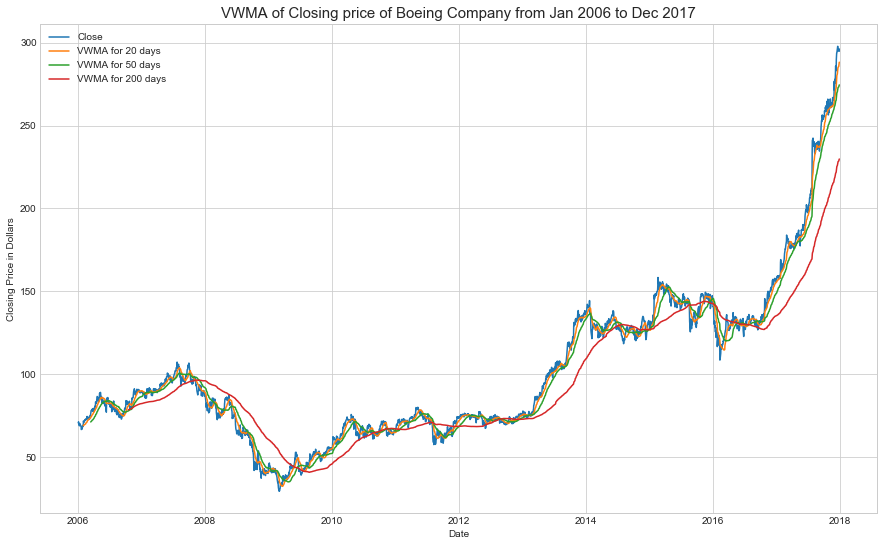

In [48]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['Close','VWMA for 20 days','VWMA for 50 days','VWMA for 200 days']:
    ax.plot(BA_MA.index, BA_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('VWMA of Closing price of Boeing Company from Jan 2006 to Dec 2017',fontsize=15)

Moving Average in the range of 20, 50 and 200 days for Caterpillar, Inc. Stocks

In [49]:
CAT = stocks.loc[idx[:],idx[:, 'CAT']].copy()
CAT.columns = CAT.columns.droplevel(1)

CAT_MA = CAT.copy()
MA_day = [20, 50, 200]

CAT_MA['CV'] = CAT_MA['Close'] * CAT_MA['Volume']

for ma in MA_day:
    MA = 'MA for {0} days' .format(str(ma))
    CV = 'CV for {0} days' .format(str(ma))
    V = 'V for {0} days' .format(str(ma))
    VWMA = 'VWMA for {0} days' .format(str(ma))
    CAT_MA[MA] = CAT_MA['Close'].rolling(ma).mean()
    CAT_MA[CV] = CAT_MA['CV'].rolling(ma).sum()
    CAT_MA[V] = CAT_MA['Volume'].rolling(ma).sum()
    CAT_MA[VWMA] = CAT_MA[CV] / CAT_MA[V]

CAT_MA.head()

,Open,High,Low,Close,Volume,CV,MA for 20 days,CV for 20 days,V for 20 days,VWMA for 20 days,MA for 50 days,CV for 50 days,V for 50 days,VWMA for 50 days,MA for 200 days,CV for 200 days,V for 200 days,VWMA for 200 days
Date,,,,,,,,,,,,,,,,,,
2006-01-03,57.87,58.11,57.05,57.80,3697500.0,213715500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,57.95,59.43,57.55,59.27,4577200.0,271290644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,59.02,59.86,59.00,59.27,4590700.0,272090789.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,59.47,60.76,59.38,60.45,5692300.0,344099535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,60.45,61.68,60.45,61.55,4409300.0,271392415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'MA of Closing price of Caterpillar, Inc. from Jan 2006 to Dec 2017')

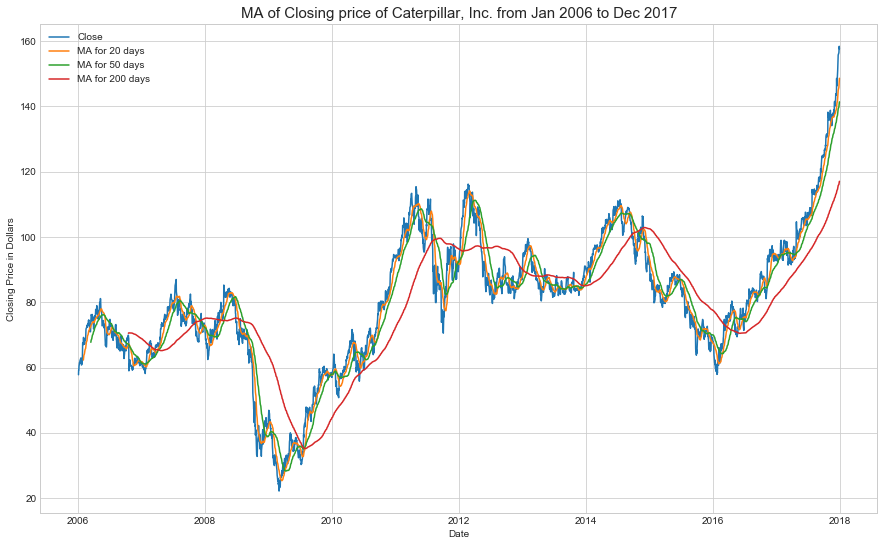

In [50]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['Close','MA for 20 days','MA for 50 days','MA for 200 days']:
    ax.plot(CAT_MA.index, CAT_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('MA of Closing price of Caterpillar, Inc. from Jan 2006 to Dec 2017',fontsize=15)

Volume Weighted Moving Average in the range of 20, 50 and 200 days for Caterpillar, Inc. Stocks

Text(0.5,1,'VWMA of Closing price of Caterpillar, Inc. from Jan 2006 to Dec 2017')

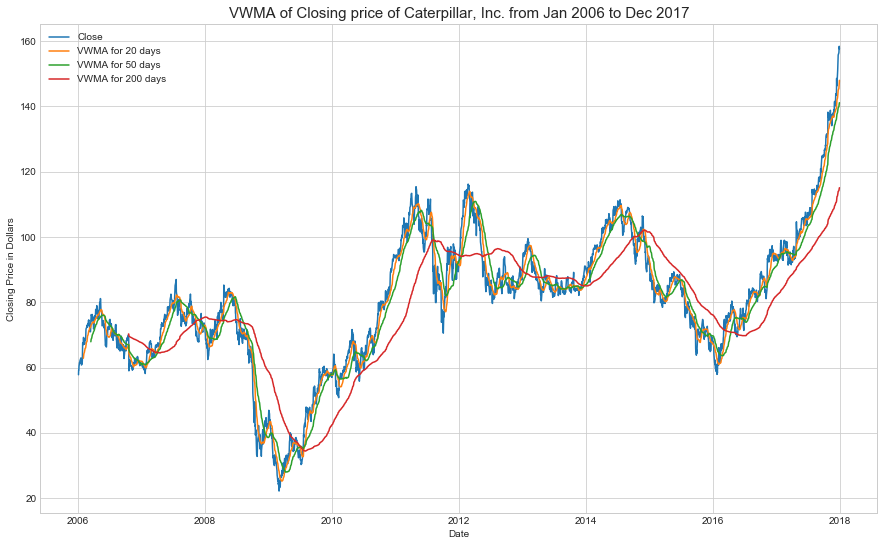

In [51]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['Close','VWMA for 20 days','VWMA for 50 days','VWMA for 200 days']:
    ax.plot(CAT_MA.index, CAT_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('VWMA of Closing price of Caterpillar, Inc. from Jan 2006 to Dec 2017',fontsize=15)

Moving Average in the range of 20, 50 and 200 days for General Electric Company

In [52]:
GE = stocks.loc[idx[:],idx[:, 'GE']].copy()
GE.columns = GE.columns.droplevel(1)

GE_MA = GE.copy()
MA_day = [20, 50, 200]

GE_MA['CV'] = GE_MA['Close'] * GE_MA['Volume']

for ma in MA_day:
    MA = 'MA for {0} days' .format(str(ma))
    CV = 'CV for {0} days' .format(str(ma))
    V = 'V for {0} days' .format(str(ma))
    VWMA = 'VWMA for {0} days' .format(str(ma))
    GE_MA[MA] = GE_MA['Close'].rolling(ma).mean()
    GE_MA[CV] = GE_MA['CV'].rolling(ma).sum()
    GE_MA[V] = GE_MA['Volume'].rolling(ma).sum()
    GE_MA[VWMA] = GE_MA[CV] / GE_MA[V]

GE_MA.head()



,Open,High,Low,Close,Volume,CV,MA for 20 days,CV for 20 days,V for 20 days,VWMA for 20 days,MA for 50 days,CV for 50 days,V for 50 days,VWMA for 50 days,MA for 200 days,CV for 200 days,V for 200 days,VWMA for 200 days
Date,,,,,,,,,,,,,,,,,,
2006-01-03,35.10,35.40,34.80,35.37,33221400.0,1.175041e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,35.35,35.40,35.10,35.32,24017300.0,8.482910e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,35.27,35.35,35.10,35.23,18860400.0,6.644519e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,35.38,35.53,35.19,35.47,22085300.0,7.833656e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,35.40,35.43,35.24,35.38,20716900.0,7.329639e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'MA of Closing price of General Electric Company from Jan 2006 to Dec 2017')

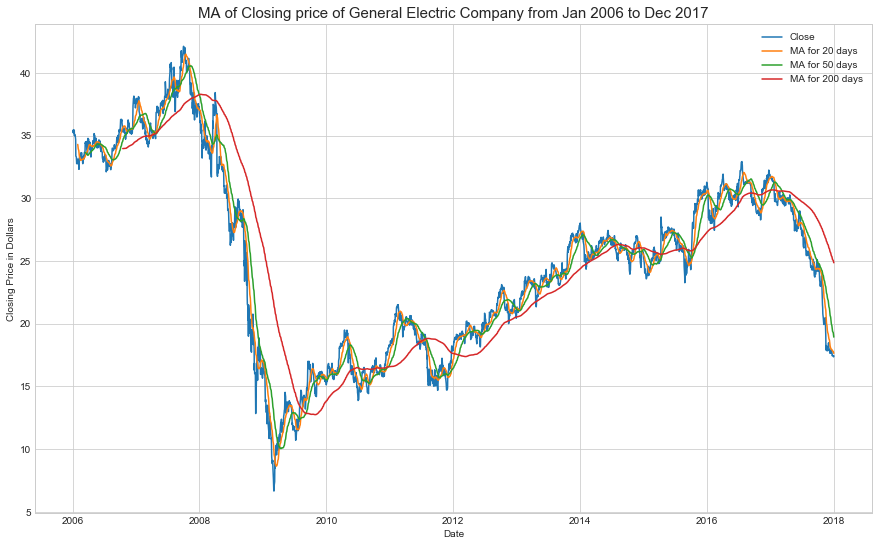

In [53]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['Close','MA for 20 days','MA for 50 days','MA for 200 days']:
    ax.plot(GE_MA.index, GE_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('MA of Closing price of General Electric Company from Jan 2006 to Dec 2017',fontsize=15)

Volume Weighted Moving Average in the range of 20, 50 and 200 days for General Electric Company Stocks

Text(0.5,1,'VWMA of Closing price of General Electric Company from Jan 2006 to Dec 2017')

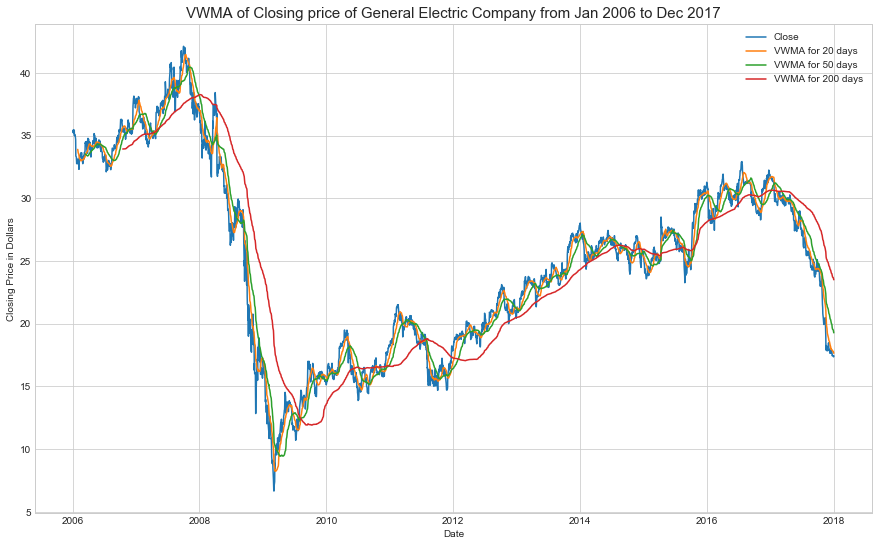

In [54]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['Close','VWMA for 20 days','VWMA for 50 days','VWMA for 200 days']:
    ax.plot(GE_MA.index, GE_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('VWMA of Closing price of General Electric Company from Jan 2006 to Dec 2017',fontsize=15)

Moving Average in the range of 20, 50 and 200 days for 3M Company

In [55]:
MMM = stocks.loc[idx[:],idx[:, 'MMM']].copy()
MMM.columns = MMM.columns.droplevel(1)

MMM_MA = MMM.copy()
MA_day = [20, 50, 200]

MMM_MA['CV'] = MMM_MA['Close'] * MMM_MA['Volume']

for ma in MA_day:
    MA = 'MA for {0} days' .format(str(ma))
    CV = 'CV for {0} days' .format(str(ma))
    V = 'V for {0} days' .format(str(ma))
    VWMA = 'VWMA for {0} days' .format(str(ma))
    MMM_MA[MA] = MMM_MA['Close'].rolling(ma).mean()
    MMM_MA[CV] = MMM_MA['CV'].rolling(ma).sum()
    MMM_MA[V] = MMM_MA['Volume'].rolling(ma).sum()
    MMM_MA[VWMA] = MMM_MA[CV] / MMM_MA[V]

MMM_MA.head()



,Open,High,Low,Close,Volume,CV,MA for 20 days,CV for 20 days,V for 20 days,VWMA for 20 days,MA for 50 days,CV for 50 days,V for 50 days,VWMA for 50 days,MA for 200 days,CV for 200 days,V for 200 days,VWMA for 200 days
Date,,,,,,,,,,,,,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200.0,246601692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,79.49,79.49,78.25,78.71,2558000.0,201340180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,78.41,78.65,77.56,77.99,2529500.0,197275705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,78.64,78.90,77.64,78.63,2479500.0,194963085.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,78.50,79.83,78.46,79.02,1845600.0,145839312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'MA of Closing price of 3M Company from Jan 2006 to Dec 2017')

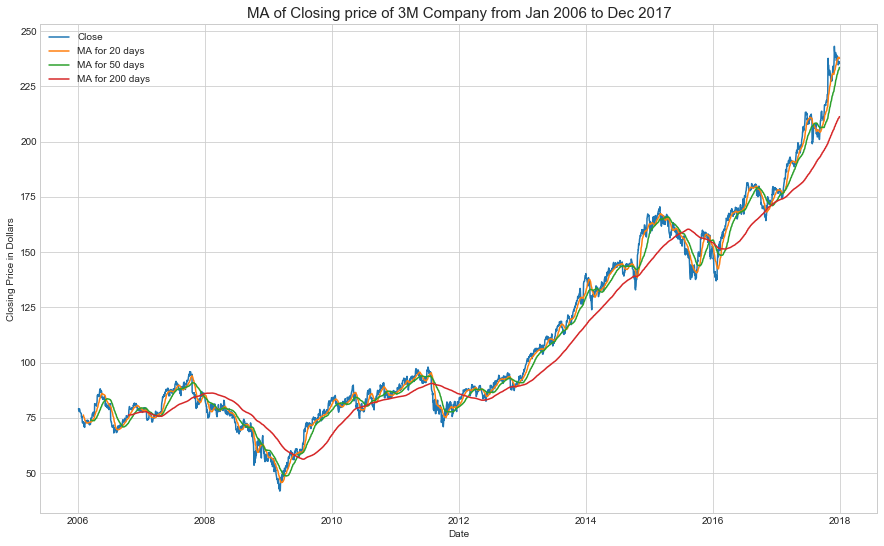

In [56]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['Close','MA for 20 days','MA for 50 days','MA for 200 days']:
    ax.plot(MMM_MA.index, MMM_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('MA of Closing price of 3M Company from Jan 2006 to Dec 2017',fontsize=15)

Volume Weighted Moving Average in the range of 20, 50 and 200 days for 3M Company Stocks

Text(0.5,1,'VWMA of Closing price of 3M Company from Jan 2006 to Dec 2017')

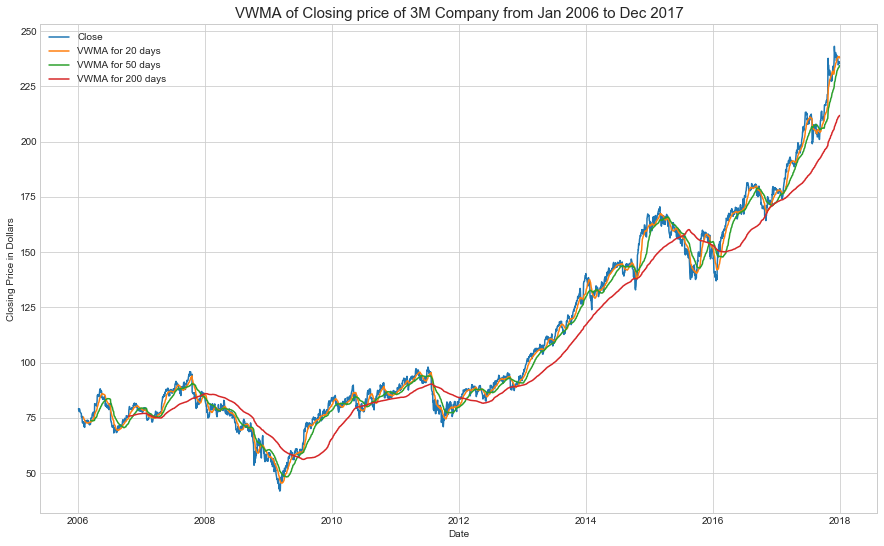

In [57]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['Close','VWMA for 20 days','VWMA for 50 days','VWMA for 200 days']:
    ax.plot(MMM_MA.index, MMM_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('VWMA of Closing price of 3M Company from Jan 2006 to Dec 2017',fontsize=15)

Moving Average in the range of 20, 50 and 200 days for United Technologies Corporation

In [58]:
UTX = stocks.loc[idx[:],idx[:, 'UTX']].copy()
UTX.columns = UTX.columns.droplevel(1)

UTX_MA = UTX.copy()
MA_day = [20, 50, 200]

UTX_MA['CV'] = UTX_MA['Close'] * UTX_MA['Volume']

for ma in MA_day:
    MA = 'MA for {0} days' .format(str(ma))
    CV = 'CV for {0} days' .format(str(ma))
    V = 'V for {0} days' .format(str(ma))
    VWMA = 'VWMA for {0} days' .format(str(ma))
    UTX_MA[MA] = UTX_MA['Close'].rolling(ma).mean()
    UTX_MA[CV] = UTX_MA['CV'].rolling(ma).sum()
    UTX_MA[V] = UTX_MA['Volume'].rolling(ma).sum()
    UTX_MA[VWMA] = UTX_MA[CV] / UTX_MA[V]

UTX_MA.head()



,Open,High,Low,Close,Volume,CV,MA for 20 days,CV for 20 days,V for 20 days,VWMA for 20 days,MA for 50 days,CV for 50 days,V for 50 days,VWMA for 50 days,MA for 200 days,CV for 200 days,V for 200 days,VWMA for 200 days
Date,,,,,,,,,,,,,,,,,,
2006-01-03,56.45,56.66,55.46,56.53,3716500.0,210093745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,56.80,56.80,55.84,56.19,3114500.0,175003755.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,56.30,56.49,55.63,55.98,3118900.0,174596022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,56.45,56.67,56.10,56.16,2874300.0,161420688.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,56.37,56.90,56.16,56.80,2467200.0,140136960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'MA of Closing price of United Technologies Corporation from Jan 2006 to Dec 2017')

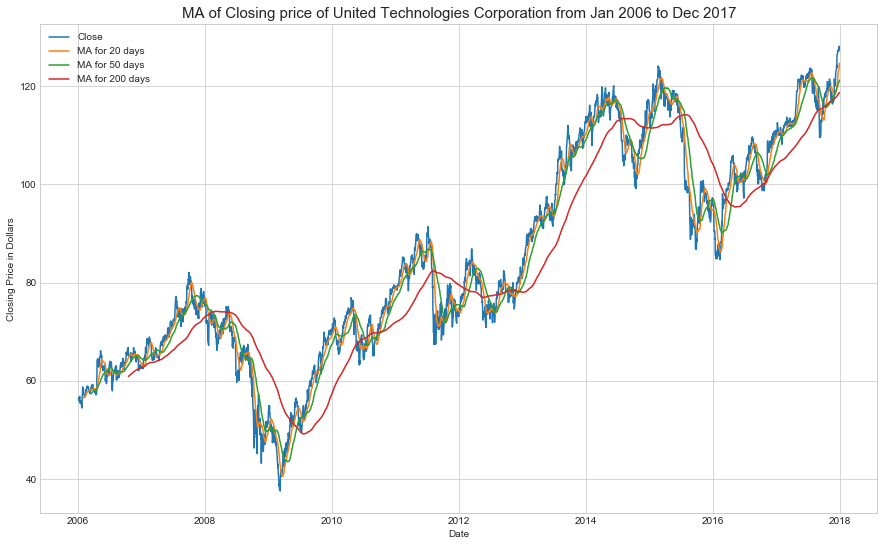

In [59]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['Close','MA for 20 days','MA for 50 days','MA for 200 days']:
    ax.plot(UTX_MA.index, UTX_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('MA of Closing price of United Technologies Corporation from Jan 2006 to Dec 2017',fontsize=15)

Volume Weighted Moving Average in the range of 20, 50 and 200 days for United Technologies Corporation Stocks

Text(0.5,1,'VWMA of Closing price of United Technologies Corporation from Jan 2006 to Dec 2017')

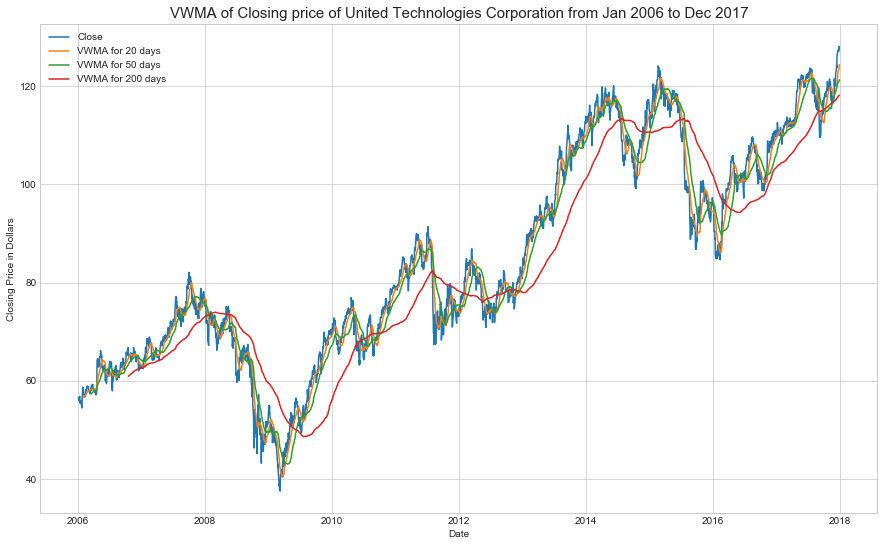

In [60]:
fig, ax = plt.subplots(figsize=(15,9))
for c in ['Close','VWMA for 20 days','VWMA for 50 days','VWMA for 200 days']:
    ax.plot(UTX_MA.index, UTX_MA[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_ylabel('Closing Price in Dollars')
ax.set_xlabel('Date')
ax.set_title('VWMA of Closing price of United Technologies Corporation from Jan 2006 to Dec 2017',fontsize=15)

2) Monthly Returns

In [61]:
ind = stocks.loc[idx[:],idx[:, ['BA','CAT','GE','MMM','UTX']]]
ind_close = ind['Close'].copy()
ind_close.head()

Stocks,BA,CAT,GE,MMM,UTX
Date,,,,,
2006-01-03,70.44,57.80,35.37,79.11,56.53
2006-01-04,71.17,59.27,35.32,78.71,56.19
2006-01-05,70.33,59.27,35.23,77.99,55.98
2006-01-06,69.35,60.45,35.47,78.63,56.16
2006-01-09,68.77,61.55,35.38,79.02,56.80


In [62]:
ind_close_monthly_return = ind_close.copy()
ind_close_monthly_return['month'] = ind_close_monthly_return.index.month
ind_close_monthly_return['year'] = ind_close_monthly_return.index.year
ind_close_monthly_return['Month_Year'] = ind_close_monthly_return.index.strftime('%b-%Y')
ind_close_monthly_return_start_CP = ind_close_monthly_return.groupby(by=['Month_Year']).first().sort_values(['year', 'month'], ascending=[True, True])

ind_close_monthly_return_start_CP.columns = [str(col) + '_start' for col in ind_close_monthly_return_start_CP.columns]

ind_close_monthly_return_end_CP = ind_close_monthly_return.groupby(by=['Month_Year']).last().sort_values(['year', 'month'], ascending=[True, True])
ind_close_monthly_return_end_CP.columns = [str(col) + '_end' for col in ind_close_monthly_return_end_CP.columns]

ind_close_monthly_return_final = ind_close_monthly_return_start_CP.join(ind_close_monthly_return_end_CP,how='inner')
ind_close_monthly_return_final.head()

,BA_start,CAT_start,GE_start,MMM_start,UTX_start,month_start,year_start,BA_end,CAT_end,GE_end,MMM_end,UTX_end,month_end,year_end
Month_Year,,,,,,,,,,,,,,
Jan-2006,70.44,57.80,35.37,79.11,56.53,1,2006,68.31,67.90,32.75,72.75,58.37,1,2006
Feb-2006,71.62,69.24,33.14,73.19,58.00,2,2006,72.69,73.08,32.87,73.59,58.50,2,2006
Mar-2006,72.95,74.39,32.76,73.67,58.70,3,2006,77.93,71.81,34.78,75.69,57.97,3,2006
Apr-2006,78.01,73.50,34.69,75.84,58.18,4,2006,83.45,75.74,34.59,85.43,62.81,4,2006
May-2006,83.86,75.63,34.39,84.97,62.93,5,2006,83.25,72.95,34.26,83.66,62.52,5,2006


In [63]:
ind_close_monthly_return_final['BA'] = (ind_close_monthly_return_final['BA_end'] - ind_close_monthly_return_final['BA_start']) / ind_close_monthly_return_final['BA_start']
ind_close_monthly_return_final['CAT'] = (ind_close_monthly_return_final['CAT_end'] - ind_close_monthly_return_final['CAT_start']) / ind_close_monthly_return_final['CAT_start']
ind_close_monthly_return_final['GE'] = (ind_close_monthly_return_final['GE_end'] - ind_close_monthly_return_final['GE_start']) / ind_close_monthly_return_final['GE_start']
ind_close_monthly_return_final['MMM'] = (ind_close_monthly_return_final['MMM_end'] - ind_close_monthly_return_final['MMM_start']) / ind_close_monthly_return_final['MMM_start']
ind_close_monthly_return_final['UTX'] = (ind_close_monthly_return_final['UTX_end'] - ind_close_monthly_return_final['UTX_start']) / ind_close_monthly_return_final['UTX_start']

ind_close_monthly_return_final.index = pd.to_datetime(ind_close_monthly_return_final.index)

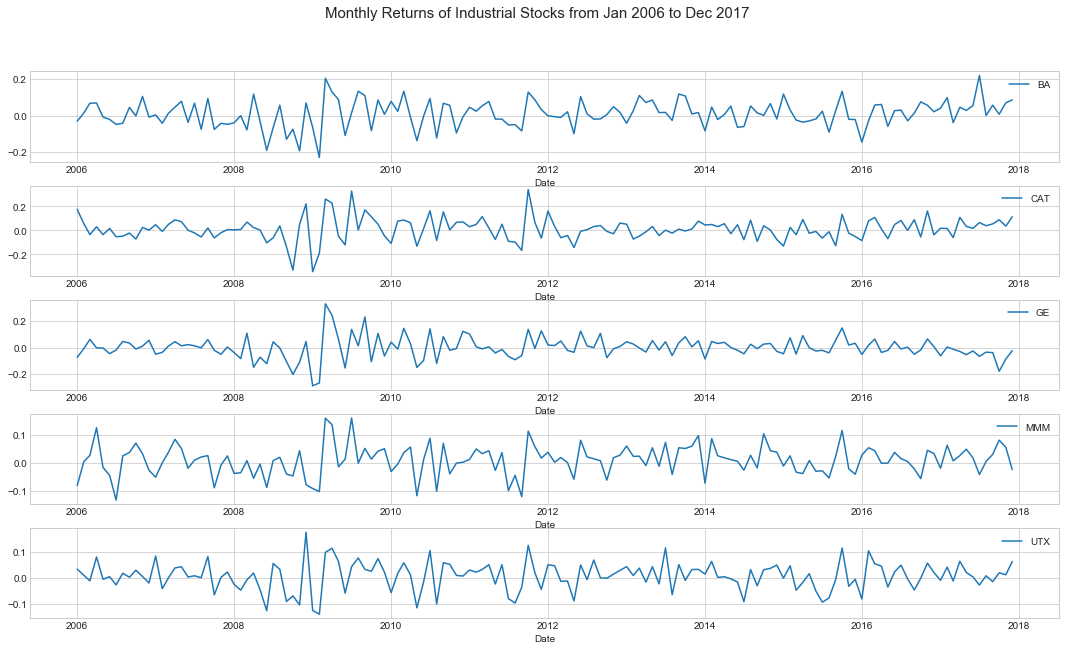

In [64]:
fig, ax = plt.subplots(5, figsize=(15,9))
fig.tight_layout()
for ind,  c in enumerate(['BA','CAT','GE','MMM','UTX']):
    ax[ind].plot(ind_close_monthly_return_final.index, ind_close_monthly_return_final[c], label=str(c))
    ax[ind].legend()
    ax[ind].grid(True)
    ax[ind].set_xlabel('Date')
fig.subplots_adjust(top=0.88)
fig.suptitle('Monthly Returns of Industrial Stocks from Jan 2006 to Dec 2017',fontsize=15)
plt.show()

3) Computing the Yearly Data for Industrial stocks from Jan 2006 to Dec 2017.

Boeing Company's Yearly data

In [65]:
BA_YearlyData = BA.groupby(BA.index.year).first()[['Open']].join(BA.groupby(BA.index.year).last()[['Close']],how='inner').join(BA.groupby(BA.index.year).max()[['High']],how='inner').join(BA.groupby(BA.index.year).min()[['Low']],how='inner').join(BA.groupby(BA.index.year).mean()[['Volume']],how='inner')
BA_YearlyData['Years'] = (BA_YearlyData.index - BA_YearlyData.index[0]) + 1
BA_YearlyData['Open_Comp'] = BA_YearlyData['Open'].iloc[0]
BA_YearlyData['CAGR_BA'] = ((BA_YearlyData['Close'] / BA_YearlyData['Open_Comp']) ** (1 / BA_YearlyData['Years'])) - 1
BA_YearlyData.head()

,Open,Close,High,Low,Volume,Years,Open_Comp,CAGR_BA
Date,,,,,,,,
2006,70.40,88.84,92.05,65.90,3.979538e+06,1,70.4,0.261932
2007,88.90,87.46,107.83,84.60,5.304707e+06,2,70.4,0.114598
2008,87.57,42.67,88.29,36.17,7.719836e+06,3,70.4,-0.153715
2009,42.80,54.13,56.56,29.05,6.879234e+06,4,70.4,-0.063589
2010,55.72,65.26,76.00,54.80,5.850630e+06,5,70.4,-0.015048


Caterpillar, Inc.'s Yearly data

In [66]:
CAT_YearlyData = CAT.groupby(CAT.index.year).first()[['Open']].join(CAT.groupby(CAT.index.year).last()[['Close']],how='inner').join(CAT.groupby(CAT.index.year).max()[['High']],how='inner').join(CAT.groupby(CAT.index.year).min()[['Low']],how='inner').join(CAT.groupby(CAT.index.year).mean()[['Volume']],how='inner')
CAT_YearlyData['Years'] = (CAT_YearlyData.index - CAT_YearlyData.index[0]) + 1
CAT_YearlyData['Open_Comp'] = CAT_YearlyData['Open'].iloc[0]
CAT_YearlyData['CAGR_CAT'] = ((CAT_YearlyData['Close'] / CAT_YearlyData['Open_Comp']) ** (1 / CAT_YearlyData['Years'])) - 1
CAT_YearlyData.head()

,Open,Close,High,Low,Volume,Years,Open_Comp,CAGR_CAT
Date,,,,,,,,
2006,57.87,61.33,82.03,57.05,5.689659e+06,1,57.87,0.059789
2007,61.71,72.56,87.00,57.98,6.265093e+06,2,57.87,0.119752
2008,72.56,44.67,85.96,31.95,8.599484e+06,3,57.87,-0.082680
2009,44.91,56.99,61.28,21.71,1.278166e+07,4,57.87,-0.003823
2010,57.65,93.66,94.89,50.50,8.555120e+06,5,57.87,0.101083


General Electric Company's Yearly data

In [67]:
GE_YearlyData = GE.groupby(GE.index.year).first()[['Open']].join(GE.groupby(GE.index.year).last()[['Close']],how='inner').join(GE.groupby(GE.index.year).max()[['High']],how='inner').join(GE.groupby(GE.index.year).min()[['Low']],how='inner').join(GE.groupby(GE.index.year).mean()[['Volume']],how='inner')
GE_YearlyData['Years'] = (GE_YearlyData.index - GE_YearlyData.index[0]) + 1
GE_YearlyData['Open_Comp'] = GE_YearlyData['Open'].iloc[0]
GE_YearlyData['CAGR_GE'] = ((GE_YearlyData['Close'] / GE_YearlyData['Open_Comp']) ** (1 / GE_YearlyData['Years'])) - 1
GE_YearlyData.head()

,Open,Close,High,Low,Volume,Years,Open_Comp,CAGR_GE
Date,,,,,,,,
2006,35.10,37.21,38.49,32.06,2.502327e+07,1,35.1,0.060114
2007,37.41,37.07,42.15,33.90,3.760139e+07,2,35.1,0.027680
2008,37.10,16.20,38.52,12.58,7.851952e+07,3,35.1,-0.227196
2009,16.51,15.13,17.52,5.73,1.176790e+08,4,35.1,-0.189724
2010,15.22,18.29,19.70,13.75,7.224449e+07,5,35.1,-0.122229


3M Company's Yearly data

In [68]:
MMM_YearlyData = MMM.groupby(MMM.index.year).first()[['Open']].join(MMM.groupby(MMM.index.year).last()[['Close']],how='inner').join(MMM.groupby(MMM.index.year).max()[['High']],how='inner').join(MMM.groupby(MMM.index.year).min()[['Low']],how='inner').join(MMM.groupby(MMM.index.year).mean()[['Volume']],how='inner')
MMM_YearlyData['Years'] = (MMM_YearlyData.index - MMM_YearlyData.index[0]) + 1
MMM_YearlyData['Open_Comp'] = MMM_YearlyData['Open'].iloc[0]
MMM_YearlyData['CAGR_MMM'] = ((MMM_YearlyData['Close'] / MMM_YearlyData['Open_Comp']) ** (1 / MMM_YearlyData['Years'])) - 1
MMM_YearlyData.head()

,Open,Close,High,Low,Volume,Years,Open_Comp,CAGR_MMM
Date,,,,,,,,
2006,77.76,77.93,88.35,67.05,3.304502e+06,1,77.76,0.002186
2007,77.53,84.32,97.00,72.90,3.883876e+06,2,77.76,0.041327
2008,84.24,57.54,84.76,50.01,5.439344e+06,3,77.76,-0.095508
2009,57.55,82.67,84.32,40.87,4.701879e+06,4,77.76,0.015425
2010,83.09,86.30,91.49,67.98,4.106655e+06,5,77.76,0.021059


United Technologies Corporation's Yearly data

In [69]:
UTX_YearlyData = UTX.groupby(UTX.index.year).first()[['Open']].join(UTX.groupby(UTX.index.year).last()[['Close']],how='inner').join(UTX.groupby(UTX.index.year).max()[['High']],how='inner').join(UTX.groupby(UTX.index.year).min()[['Low']],how='inner').join(UTX.groupby(UTX.index.year).mean()[['Volume']],how='inner')
UTX_YearlyData['Years'] = (UTX_YearlyData.index - UTX_YearlyData.index[0]) + 1
UTX_YearlyData['Open_Comp'] = UTX_YearlyData['Open'].iloc[0]
UTX_YearlyData['CAGR_UTX'] = ((UTX_YearlyData['Close'] / UTX_YearlyData['Open_Comp']) ** (1 / UTX_YearlyData['Years'])) - 1
UTX_YearlyData.head()

,Open,Close,High,Low,Volume,Years,Open_Comp,CAGR_UTX
Date,,,,,,,,
2006,56.45,62.52,67.47,54.20,3.629444e+06,1,56.45,0.107529
2007,62.60,76.54,82.50,61.85,4.587926e+06,2,56.45,0.164427
2008,76.64,53.60,77.14,41.76,6.886870e+06,3,56.45,-0.017120
2009,53.46,69.41,70.89,37.40,5.916916e+06,4,56.45,0.053027
2010,70.21,78.72,79.70,62.88,4.748220e+06,5,56.45,0.068770


4) Compound Annual Growth Rate (CAGR)

In [70]:
CAGR_IND = BA_YearlyData[['CAGR_BA']].join(CAT_YearlyData[['CAGR_CAT']],how='inner').join(GE_YearlyData[['CAGR_GE']],how='inner').join(MMM_YearlyData[['CAGR_MMM']],how='inner').join(UTX_YearlyData[['CAGR_UTX']],how='inner')
CAGR_IND.head()

,CAGR_BA,CAGR_CAT,CAGR_GE,CAGR_MMM,CAGR_UTX
Date,,,,,
2006,0.261932,0.059789,0.060114,0.002186,0.107529
2007,0.114598,0.119752,0.027680,0.041327,0.164427
2008,-0.153715,-0.082680,-0.227196,-0.095508,-0.017120
2009,-0.063589,-0.003823,-0.189724,0.015425,0.053027
2010,-0.015048,0.101083,-0.122229,0.021059,0.068770


Text(0.5,1,'CAGR of Industrial Stocks from Jan 2006 to Dec 2017')

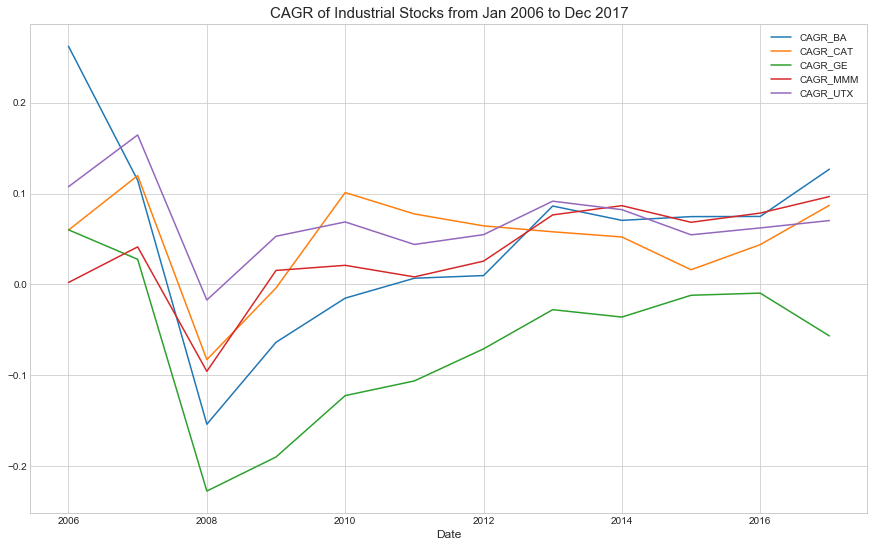

In [71]:
fig, ax = plt.subplots(figsize=(15,9))

for c in CAGR_IND:
    ax.plot(CAGR_IND.index, CAGR_IND[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_xlabel('Date',fontsize=12)
ax.set_title('CAGR of Industrial Stocks from Jan 2006 to Dec 2017',fontsize=15)

5) Volatility

In [72]:
ind_vix = ind_close.copy()
for c in ind_vix:
    ind_vix[c] = (ind_vix[c] - ind_vix[c].min()) / (ind_vix[c].max() - ind_vix[c].min())
ind_vix.head()

Stocks,BA,CAT,GE,MMM,UTX
Date,,,,,
2006-01-03,0.152975,0.261505,0.809645,0.185187,0.209474
2006-01-04,0.155694,0.272294,0.808235,0.183200,0.205720
2006-01-05,0.152566,0.272294,0.805697,0.179623,0.203401
2006-01-06,0.148916,0.280954,0.812465,0.182803,0.205389
2006-01-09,0.146757,0.289028,0.809927,0.184740,0.212456


In [73]:
ind_vix.groupby(ind_vix.index.year).std()

Stocks,BA,CAT,GE,MMM,UTX
Date,,,,,
2006,0.022565,0.041272,0.034632,0.024022,0.033557
2007,0.019434,0.047552,0.056054,0.029415,0.054209
2008,0.056887,0.112751,0.186964,0.038934,0.097930
2009,0.024725,0.081406,0.065534,0.056112,0.094641
2010,0.015322,0.079485,0.033924,0.016426,0.043427
2011,0.019582,0.073025,0.054551,0.034897,0.067667
2012,0.007687,0.080653,0.033885,0.014884,0.037816
2013,0.073252,0.032259,0.046307,0.050750,0.088894
2014,0.018716,0.044387,0.019969,0.046590,0.054837


Yearly Standard deviation of Closing Price of Industrial Stocks from Jan 2006 to Dec 2017

Text(0.5,1,'Volatility - Industrial Stocks from Jan 2006 to Dec 2017')

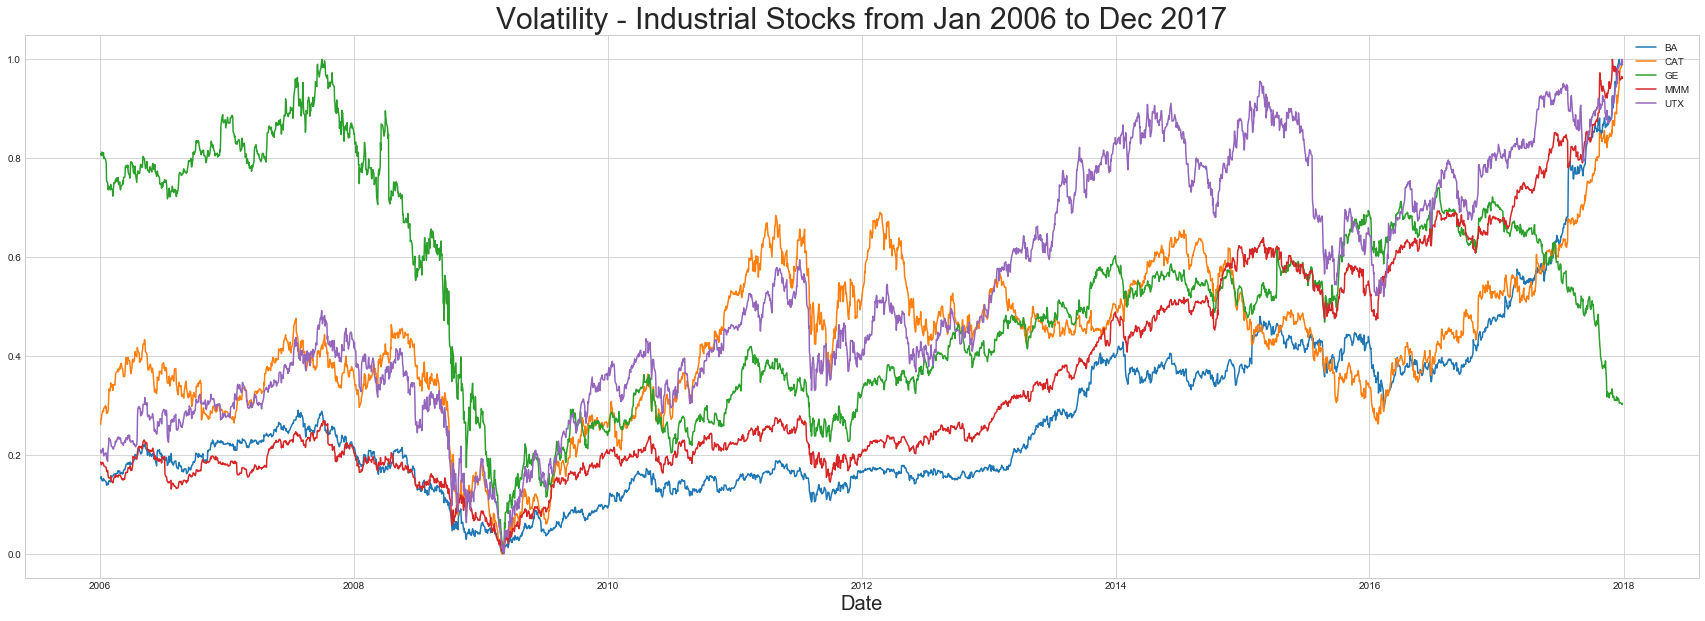

In [74]:
fig, ax = plt.subplots(figsize=(30,10))

for c in ind_vix:
    ax.plot(ind_vix.index, ind_vix[c], label=str(c))
    ax.legend()
    ax.grid(True)
ax.set_xlabel('Date',fontsize=20)
ax.set_title('Volatility - Industrial Stocks from Jan 2006 to Dec 2017',fontsize=30)